# Projet Accidents : distribution des données explicatives et de la variable cible

## 1. Création du df

In [1]:
import pandas as pd
pd.set_option('display.max_row', 111)  # Permet d'afficher un grand nombre de lignes
pd.set_option('display.max_colum', 111)  # Permet d'afficher un grand nombre de colonnes

In [2]:
# Pour ouvrir le fichier df à 2 636 489 lignes et 59 colonnes. Le df maitre.
import pandas as pd

df = pd.read_csv("df_rob.csv")
df.head()

C:\Users\rtumb\AppData\Local\Temp\ipykernel_18976\1266736320.py:4: DtypeWarning: Columns (8,12,16,24,35,37,38,39,40,42,46,47,48,52,53) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("df_rob.csv")


,Num_Acc,place,catu,grav,sexe,trajet,secu,locp,actp,etatp,an_nais,num_veh,id_vehicule_x,secu1,secu2,secu3,id_usager,senc,catv,occutc,obs,obsm,choc,manv,id_vehicule_y,motor,an,mois,jour,hrmn,lum,agg,int,atm,col,com,adr,gps,lat,long,dep,catr,voie,v1,v2,circ,nbv,pr,pr1,vosp,prof,plan,lartpc,larrout,surf,infra,situ,env1,vma,hour_category
0,200500000001,1.0,1,4,1,1.0,11.0,0.0,0.0,0.0,1976.0,A01,NaN,NaN,NaN,NaN,NaN,0.0,7,0.0,0.0,2.0,1.0,1.0,NaN,NaN,2005,1,12,19:00,3,2,1,1.0,3.0,11.0,CD41B,M,5051500.0,294400.0,59,3.0,41.0,0.0,B,2.0,2.0,1.0,430.0,0.0,1.0,1.0,0.0,63.0,1.0,0.0,1.0,0.0,NaN,19
1,200500000001,1.0,1,3,2,3.0,11.0,0.0,0.0,0.0,1968.0,B02,NaN,NaN,NaN,NaN,NaN,0.0,7,0.0,0.0,2.0,8.0,10.0,NaN,NaN,2005,1,12,19:00,3,2,1,1.0,3.0,11.0,CD41B,M,5051500.0,294400.0,59,3.0,41.0,0.0,B,2.0,2.0,1.0,430.0,0.0,1.0,1.0,0.0,63.0,1.0,0.0,1.0,0.0,NaN,19
2,200500000001,2.0,2,1,1,0.0,11.0,0.0,0.0,0.0,1964.0,B02,NaN,NaN,NaN,NaN,NaN,0.0,7,0.0,0.0,2.0,8.0,10.0,NaN,NaN,2005,1,12,19:00,3,2,1,1.0,3.0,11.0,CD41B,M,5051500.0,294400.0,59,3.0,41.0,0.0,B,2.0,2.0,1.0,430.0,0.0,1.0,1.0,0.0,63.0,1.0,0.0,1.0,0.0,NaN,19
3,200500000001,4.0,2,1,1,0.0,31.0,0.0,0.0,0.0,2004.0,B02,NaN,NaN,NaN,NaN,NaN,0.0,7,0.0,0.0,2.0,8.0,10.0,NaN,NaN,2005,1,12,19:00,3,2,1,1.0,3.0,11.0,CD41B,M,5051500.0,294400.0,59,3.0,41.0,0.0,B,2.0,2.0,1.0,430.0,0.0,1.0,1.0,0.0,63.0,1.0,0.0,1.0,0.0,NaN,19
4,200500000001,5.0,2,1,1,0.0,11.0,0.0,0.0,0.0,1998.0,B02,NaN,NaN,NaN,NaN,NaN,0.0,7,0.0,0.0,2.0,8.0,10.0,NaN,NaN,2005,1,12,19:00,3,2,1,1.0,3.0,11.0,CD41B,M,5051500.0,294400.0,59,3.0,41.0,0.0,B,2.0,2.0,1.0,430.0,0.0,1.0,1.0,0.0,63.0,1.0,0.0,1.0,0.0,NaN,19


### Caractéristiques du df - Dimensions et Dtypes

In [3]:
df.shape  

(2633631, 60)

In [ ]:
# Erwan a 2636489 lignes (2858 de plus que moi car il n'a pas supprimé les doublons) 
# et 59 colonnes (1 de moins que moi car j'ai déjà créé la colonne hour_category)
# Nous avons tous les 2 supprimé les 94 796 lignes des dom tom.

In [4]:
df.dtypes.value_counts()

float64    29
object     19
int64      12
Name: count, dtype: int64

In [ ]:
#Erwan
#float64    29
#object     19
#int64      11

In [ ]:
# J'ai également déjà homogénénisé les années, les heures, les départements (il faudra retransformer 2A et 2B en 201 et 202)

# 2. Etudes des variables et de la cible (Analyse de forme)

- Identification de la variable cible
- Identifier les variables catégorielles encodées et non-encodées et Aperçu de leur distribution
- Identifier les variables quantitative continue et aperçu des variances.

### 2.1 La variable cible 'grav'

La variable est préservée de 2005 à 2022.
Gravité de l'accident : Les usagers accidentés sont classés en trois catégories de victimes plus les indemnes  
1 - Indemne  
2 - Tué  
3 - Blessé hospitalisé  
4 - Blessé léger  
-1 - Non renseigné 

### 2.2 Les variables catégorielles encodées et non encodées

Lecture de la doc.

In [45]:
import pandas as pd

df = pd.read_csv("df_2019_2022.csv", sep=',')
df.head()

C:\Users\campa\AppData\Local\Temp\ipykernel_3276\2456987721.py:3: DtypeWarning: Columns (15,43,49,50) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("df_2019_2022.csv", sep=',')


,Num_Acc,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp,id_usager,senc,catv,obs,obsm,choc,manv,motor,occutc,jour,mois,an,hrmn,lum,dep,com,agg,int,atm,col,adr,lat,long,catr,voie,v1,v2,circ,nbv,vosp,prof,pr,pr1,plan,lartpc,larrout,surf,infra,situ,vma
0,201900000001,138 306 524,B01,2,2,4,2,2002.0,0,1,0,-1,-1,-1,-1,NaN,2,7,0,2,5,23,1,NaN,30,11,2019,01:30,4,93,93053,1,1,1,2,AUTOROUTE A3,"48,8962100","2,4701200",1,3,0.0,NaN,3,10,0,1,6,900,2,NaN,NaN,1,2,1,70
1,201900000001,138 306 524,B01,1,1,4,2,1993.0,5,1,0,-1,-1,-1,-1,NaN,2,7,0,2,5,23,1,NaN,30,11,2019,01:30,4,93,93053,1,1,1,2,AUTOROUTE A3,"48,8962100","2,4701200",1,3,0.0,NaN,3,10,0,1,6,900,2,NaN,NaN,1,2,1,70
2,201900000001,138 306 525,A01,1,1,1,1,1959.0,0,1,0,-1,-1,-1,-1,NaN,2,17,1,0,3,11,1,NaN,30,11,2019,01:30,4,93,93053,1,1,1,2,AUTOROUTE A3,"48,8962100","2,4701200",1,3,0.0,NaN,3,10,0,1,6,900,2,NaN,NaN,1,2,1,70
3,201900000002,138 306 523,A01,1,1,4,2,1994.0,0,1,0,-1,-1,-1,-1,NaN,1,7,4,0,1,0,1,NaN,30,11,2019,02:50,3,93,93066,1,1,1,6,AUTOROUTE A1,"48,9307000","2,3688000",1,1,0.0,NaN,1,2,0,4,3,845,2,NaN,NaN,1,0,1,70
4,201900000003,138 306 520,A01,1,1,1,1,1996.0,0,1,0,-1,-1,0,-1,NaN,1,7,0,2,1,2,1,NaN,28,11,2019,15:15,1,92,92036,1,1,1,4,AUTOROUTE A86,"48,9358718","2,3191744",1,86,0.0,NaN,3,8,0,1,10,500,3,NaN,NaN,1,0,1,90


In [44]:

# Là Erwan travaille sur le df 2019_2022 !! Ce sont des chiffres des données 2019_2022 !!


# Calculer le nombre de valeurs '-1' pour chaque variable
count_minus_one = df.apply(lambda x: (x == -1).sum())

# Calculer la proportion de valeurs '-1' pour chaque variable
proportion_minus_one = df.apply(lambda x: (x == -1).mean())

# Créer un DataFrame à partir des séries précédemment calculées
df_2 = pd.DataFrame({'Count of -1': count_minus_one, 'Proportion of -1': proportion_minus_one})

# Calculer la proportion de valeurs manquantes pour chaque variable
proportion_missing_values = df.isna().mean()

# Ajouter une colonne au DataFrame df_2 avec la proportion de valeurs manquantes
df_2['Proportion of Missing Values'] = proportion_missing_values

# Filtrer les variables avec une proportion de -1 supérieure à 0.05 ou une proportion de valeurs manquantes supérieure à 0.05
variables_with_high_proportion = df_2[(df_2['Proportion of -1'] > 0.05) | (df_2['Proportion of Missing Values'] > 0.05)]

# Afficher les variables filtrées
print(variables_with_high_proportion)


           Count of -1  Proportion of -1  Proportion of Missing Values
secu2           193509          0.391574                      0.000000
secu3           488588          0.988680                      0.000000
locp            216753          0.438610                      0.000000
etatp           456246          0.923235                      0.000000
id_usager            0          0.000000                      0.482154
occutc               0          0.000000                      0.987430
voie                 0          0.000000                      0.096248
v1               63477          0.128449                      0.049771
v2                   0          0.000000                      0.919985
circ             26262          0.053142                      0.000000
lartpc               0          0.000000                      0.997811
larrout              0          0.000000                      0.267404


In [5]:

# Moi je travaille sur mon df de 2005_2022

# Calculer le nombre de valeurs '-1' pour chaque variable
count_minus_one = df.apply(lambda x: (x == -1).sum())

# Calculer la proportion de valeurs '-1' pour chaque variable
proportion_minus_one = df.apply(lambda x: (x == -1).mean())

# Créer un DataFrame à partir des séries précédemment calculées
df_2 = pd.DataFrame({'Count of -1': count_minus_one, 'Proportion of -1': proportion_minus_one})

# Calculer la proportion de valeurs manquantes pour chaque variable
proportion_missing_values = df.isna().mean()

# Ajouter une colonne au DataFrame df_2 avec la proportion de valeurs manquantes
df_2['Proportion of Missing Values'] = proportion_missing_values

# Filtrer les variables avec une proportion de -1 supérieure à 0.05 ou une proportion de valeurs manquantes supérieure à 0.05
variables_with_high_proportion = df_2[(df_2['Proportion of -1'] > 0.05) | (df_2['Proportion of Missing Values'] > 0.05)]

# Afficher les variables filtrées
print(variables_with_high_proportion)

               Count of -1  Proportion of -1  Proportion of Missing Values
secu                     0          0.000000                      0.209038
locp                216790          0.082316                      0.021396
etatp               456258          0.173243                      0.021417
id_vehicule_x            0          0.000000                      0.812369
secu1                 5591          0.002123                      0.812369
secu2               193468          0.073461                      0.812369
secu3               488540          0.185501                      0.812369
id_usager                0          0.000000                      0.902828
occutc                   0          0.000000                      0.185301
id_vehicule_y            0          0.000000                      0.812369
motor                 1079          0.000410                      0.812369
adr                      0          0.000000                      0.131111
gps                      

#### Présentation de 4 variables 

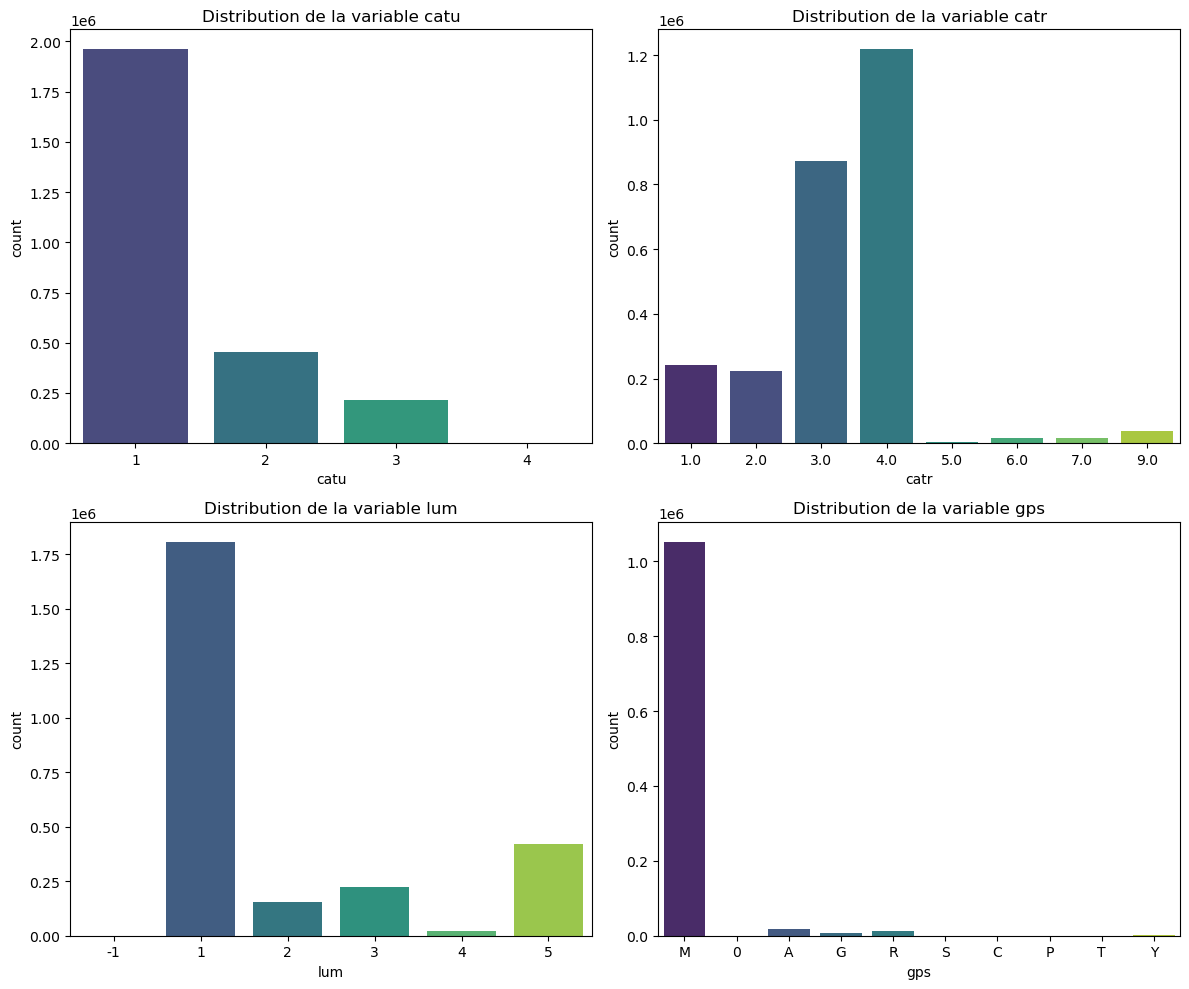

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Création de la figure avec 4 sous-graphiques
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Distribution de la variable 'catu'
sns.countplot(x='catu', data=df, ax=axes[0, 0], palette='viridis')
axes[0, 0].set_title('Distribution de la variable catu')

# Distribution de la variable 'catr'
sns.countplot(x='catr', data=df, ax=axes[0, 1], palette='viridis')
axes[0, 1].set_title('Distribution de la variable catr')

# Distribution de la variable 'lum'
sns.countplot(x='lum', data=df, ax=axes[1, 0], palette='viridis')
axes[1, 0].set_title('Distribution de la variable lum')

# Distribution de la variable 'gps'
sns.countplot(x='gps', data=df, ax=axes[1, 1], palette='viridis')
axes[1, 1].set_title('Distribution de la variable gps')

# Ajustement des espacements entre les sous-graphiques
plt.tight_layout()

# Affichage de la figure
plt.show()


#### Variable etatp

Cette variable permet de préciser si le piéton accidenté était seul ou non :  
-1 – Non renseigné  
1 – Seul  
2 – Accompagné  
3 – En groupe  


In [7]:
locp_counts = df['etatp'].value_counts()
total_count = len(df['etatp'])
print("Valeurs uniques et leur décompte pour la variable 'etatp':")
for value, count in locp_counts.items():
    percentage = (count / total_count) * 100
    print(f"{value}: {count} ({percentage:.2f}%)")
    
na_count = df['etatp'].isna().sum()
percentage_missing = (na_count / total_count) * 100
print("Nombre de valeurs manquantes pour la variable 'etatp':", na_count)
print("Pourcentage de données manquantes pour la variable 'etatp': {:.2f}%".format(percentage_missing))


Valeurs uniques et leur décompte pour la variable 'etatp':
0.0: 1912633 (72.62%)
-1.0: 456258 (17.32%)
1.0: 158467 (6.02%)
2.0: 41179 (1.56%)
3.0: 8689 (0.33%)
Nombre de valeurs manquantes pour la variable 'etatp': 56405
Pourcentage de données manquantes pour la variable 'etatp': 2.14%


In [8]:
df['etatp'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2633631 entries, 0 to 2633630
Series name: etatp
Non-Null Count    Dtype  
--------------    -----  
2577226 non-null  float64
dtypes: float64(1)
memory usage: 20.1 MB


In [ ]:
#Valeurs uniques et leur décompte pour la variable 'etatp':
#-1: 456246 (92.32%)
#1: 28863 (5.84%)
#2: 7564 (1.53%)
#3: 1509 (0.31%)
#Nombre de valeurs manquantes pour la variable 'etatp': 0
#Pourcentage de données manquantes pour la variable 'etatp': 0.00%

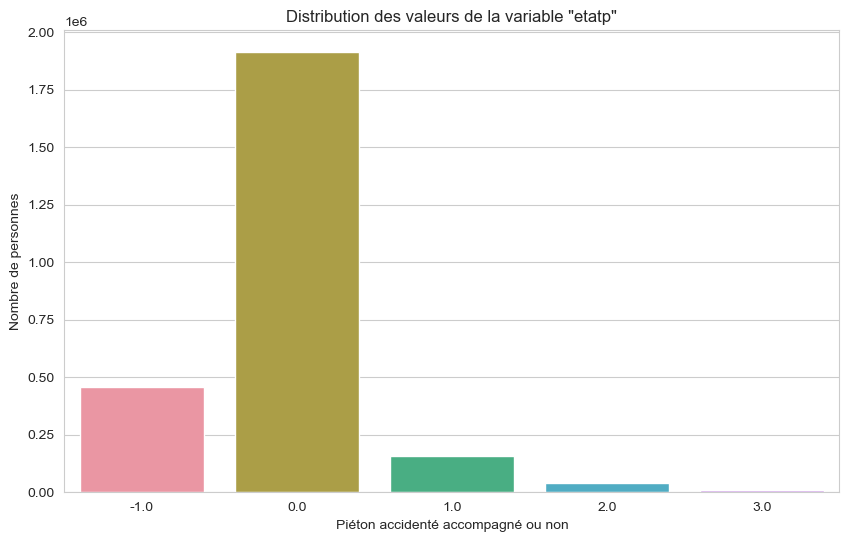

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Réglages de style optionnels
sns.set_style("whitegrid")
#sns.set_palette(sns.color_palette(["blue"]))

# Tracer le graphique de distribution des valeurs de 'etatp'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='etatp')
#sns.histplot(data=df, x='etatp', kde=False, binwidth=0.5)
plt.title('Distribution des valeurs de la variable "etatp"')
plt.xlabel('Piéton accidenté accompagné ou non')
plt.ylabel('Nombre de personnes')
plt.show()


La valeur '0' n'est pas documentée, on ne connait pas sa signification. Suppression de la variable pronostiquée.

#### Variable locp

locp  
Localisation du piéton :  
-1 – Non renseigné  
0 – Sans objet  
Sur chaussée :  
1 – A + 50 m du passage piéton  
2 – A – 50 m du passage piéton  
Sur passage piéton :  
3 – Sans signalisation lumineuse  
4 – Avec signalisation lumineuse  
Divers :  
5 – Sur trottoir  
6 – Sur accotement  

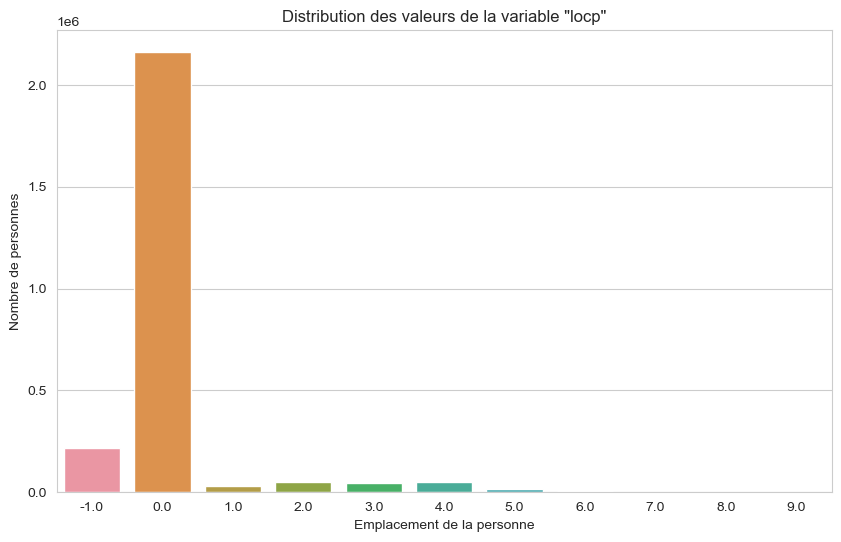

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Réglages de style optionnels
sns.set_style("whitegrid")

# Tracer le graphique de distribution des valeurs de 'locp'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='locp')
plt.title('Distribution des valeurs de la variable "locp"')
plt.xlabel('Emplacement de la personne')
plt.ylabel('Nombre de personnes')
plt.show()


In [21]:
locp_counts = df['locp'].value_counts()
total_count = len(df['locp'])
print("Valeurs uniques et leur décompte pour la variable 'locp':")
for value, count in locp_counts.items():
    percentage = (count / total_count) * 100
    print(f"{value}: {count} ({percentage:.2f}%)")
    
na_count = df['locp'].isna().sum()
percentage_missing = (na_count / total_count) * 100
print("Nombre de valeurs manquantes pour la variable 'locp':", na_count)
print("Pourcentage de données manquantes pour la variable 'locp': {:.2f}%".format(percentage_missing))


Valeurs uniques et leur décompte pour la variable 'locp':
0.0: 2160442 (82.03%)
-1.0: 216790 (8.23%)
2.0: 50387 (1.91%)
4.0: 49191 (1.87%)
3.0: 46132 (1.75%)
1.0: 31235 (1.19%)
5.0: 13959 (0.53%)
6.0: 4689 (0.18%)
8.0: 2366 (0.09%)
9.0: 1845 (0.07%)
7.0: 247 (0.01%)
Nombre de valeurs manquantes pour la variable 'locp': 56348
Pourcentage de données manquantes pour la variable 'locp': 2.14%


In [ ]:
#Valeurs uniques et leur décompte pour la variable 'locp':
#0: 239557 (48.48%)
#-1: 216753 (43.86%)
#3: 11777 (2.38%)
#2: 8435 (1.71%)
#4: 5678 (1.15%)
#1: 5513 (1.12%)
#5: 2928 (0.59%)
#9: 1844 (0.37%)
#6: 1109 (0.22%)
#8: 546 (0.11%)
#7: 42 (0.01%)
#Nombre de valeurs manquantes pour la variable 'locp': 0
#Pourcentage de données manquantes pour la variable 'locp': 0.00%

Dominante sur des valeurs non renseignées. Suppression de la variable ?

#### Variable situ

situ  
Situation de l’accident :  
-1 – Non renseigné  
0 – Aucun  
1 – Sur chaussée  
2 – Sur bande d’arrêt d’urgence  
3 – Sur accotement  
4 – Sur trottoir  
5 – Sur piste cyclable  
6 – Sur autre voie spéciale  
8 – Autres  

In [24]:
#locp_counts = df['situ'].value_counts()
#print("Valeurs uniques et leur décompte pour la variable 'situ':")
#print(locp_counts)

#na_count = df['situ'].isna().sum()
#print("Nombre de valeurs manquantes pour la variable 'situ':", na_count)

locp_counts = df['situ'].value_counts()
total_count = len(df['situ'])
print("Valeurs uniques et leur décompte pour la variable 'situ':")
for value, count in locp_counts.items():
    percentage = (count / total_count) * 100
    print(f"{value}: {count} ({percentage:.2f}%)")
    
na_count = df['situ'].isna().sum()
percentage_missing = (na_count / total_count) * 100
print("Nombre de valeurs manquantes pour la variable 'situ':", na_count)
print("Pourcentage de données manquantes pour la variable 'situ': {:.2f}%".format(percentage_missing))

Valeurs uniques et leur décompte pour la variable 'situ':
1.0: 2264384 (85.98%)
3.0: 164488 (6.25%)
0.0: 99775 (3.79%)
4.0: 36444 (1.38%)
5.0: 20312 (0.77%)
2.0: 18404 (0.70%)
8.0: 12272 (0.47%)
6.0: 5675 (0.22%)
-1.0: 275 (0.01%)
Nombre de valeurs manquantes pour la variable 'situ': 11602
Pourcentage de données manquantes pour la variable 'situ': 0.44%


In [ ]:
#Valeurs uniques et leur décompte pour la variable 'situ':
#situ
# 1    428619
# 3     26389
# 8     12279
# 5      8841
# 4      7781
# 6      5678
# 2      4320
#-1       275
#Name: count, dtype: int64
#Nombre de valeurs manquantes pour la variable 'situ': 0

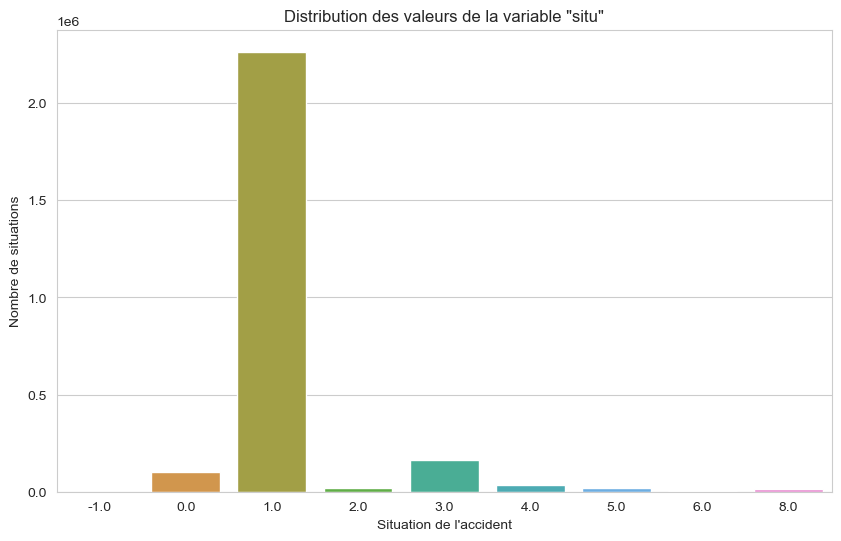

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Réglages de style optionnels
sns.set_style("whitegrid")

# Tracer le graphique de distribution des valeurs de 'locp'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='situ')
plt.title('Distribution des valeurs de la variable "situ"')
plt.xlabel("Situation de l'accident")
plt.ylabel('Nombre de situations')
plt.show()

Les valeurs NaN et -1 peuvent être remplacer par le mode ou le plus proche voisin (KNN).  

Que signifie 0 - Aucun ???

#### Variable infra

infra  
Aménagement - Infrastructure :  
-1 – Non renseigné  
0 – Aucun  
1 – Souterrain - tunnel  
2 – Pont - autopont  
3 – Bretelle d’échangeur ou de raccordement  
4 – Voie ferrée  
5 – Carrefour aménagé  
6 – Zone piétonne  
7 – Zone de péage  
8 – Chantier  
9 – Autres  

In [25]:
#locp_counts = df['infra'].value_counts()
#print("Valeurs uniques et leur décompte pour la variable 'infra':")
#print(locp_counts)

#na_count = df['infra'].isna().sum()
#print("Nombre de valeurs manquantes pour la variable 'infra':", na_count)

locp_counts = df['infra'].value_counts()
total_count = len(df['infra'])
print("Valeurs uniques et leur décompte pour la variable 'infra':")
for value, count in locp_counts.items():
    percentage = (count / total_count) * 100
    print(f"{value}: {count} ({percentage:.2f}%)")
    
na_count = df['infra'].isna().sum()
percentage_missing = (na_count / total_count) * 100
print("Nombre de valeurs manquantes pour la variable 'infra':", na_count)
print("Pourcentage de données manquantes pour la variable 'infra': {:.2f}%".format(percentage_missing))


Valeurs uniques et leur décompte pour la variable 'infra':
0.0: 2298603 (87.28%)
5.0: 162884 (6.18%)
3.0: 40346 (1.53%)
2.0: 40071 (1.52%)
1.0: 25249 (0.96%)
9.0: 17310 (0.66%)
6.0: 17002 (0.65%)
4.0: 9253 (0.35%)
-1.0: 4462 (0.17%)
8.0: 3787 (0.14%)
7.0: 2070 (0.08%)
Nombre de valeurs manquantes pour la variable 'infra': 12594
Pourcentage de données manquantes pour la variable 'infra': 0.48%


In [ ]:
#Valeurs uniques et leur décompte pour la variable 'infra':
#infra
# 0.0    2301030
# 5.0     163098
# 3.0      40376
# 2.0      40159
# 1.0      25266
# 9.0      17317
# 6.0      17047
# 4.0       9275
#-1.0       4462
# 8.0       3788
# 7.0       2071
#Name: count, dtype: int64
#Nombre de valeurs manquantes pour la variable 'infra': 12600

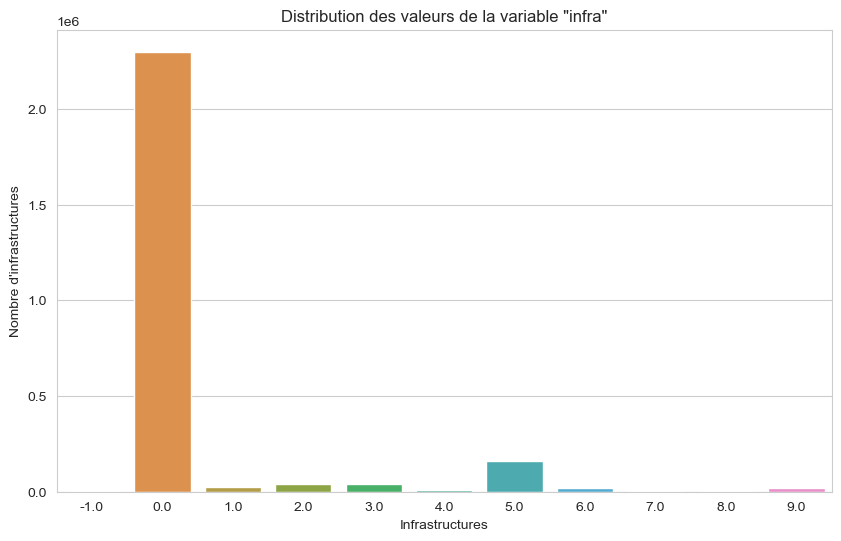

In [30]:
# Réglages de style optionnels
sns.set_style("whitegrid")

# Tracer le graphique de distribution des valeurs de 'infra'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='infra')
plt.title('Distribution des valeurs de la variable "infra"')
plt.xlabel("Infrastructures")
plt.ylabel("Nombre d'infrastructures")
plt.show()

Imputation des NaN et des -1 par mode ou plus proche voisin (KNN) ?

#### Variable place

place  
Permet de situer la place occupée dans le véhicule par l'usager au moment de l'accident. Le détail est donné par l’illustration ci-dessous :  
voir la doc. 
Absence de valeur définie pour non renseignée.


In [26]:
#locp_counts = df['place'].value_counts()
#print("Valeurs uniques et leur décompte pour la variable 'place':")
#print(locp_counts)

#na_count = df['place'].isna().sum()
#print("Nombre de valeurs manquantes pour la variable 'place':", na_count)

locp_counts = df['place'].value_counts()
total_count = len(df['place'])
print("Valeurs uniques et leur décompte pour la variable 'place':")
for value, count in locp_counts.items():
    percentage = (count / total_count) * 100
    print(f"{value}: {count} ({percentage:.2f}%)")
    
na_count = df['place'].isna().sum()
percentage_missing = (na_count / total_count) * 100
print("Nombre de valeurs manquantes pour la variable 'place':", na_count)
print("Pourcentage de données manquantes pour la variable 'place': {:.2f}%".format(percentage_missing))


Valeurs uniques et leur décompte pour la variable 'place':
1.0: 1962621 (74.52%)
2.0: 281710 (10.70%)
0.0: 60563 (2.30%)
3.0: 60172 (2.28%)
4.0: 52048 (1.98%)
10.0: 38550 (1.46%)
5.0: 26569 (1.01%)
7.0: 9142 (0.35%)
9.0: 8998 (0.34%)
8.0: 7864 (0.30%)
6.0: 2633 (0.10%)
-1.0: 25 (0.00%)
Nombre de valeurs manquantes pour la variable 'place': 122736
Pourcentage de données manquantes pour la variable 'place': 4.66%


In [ ]:
#Valeurs uniques et leur décompte pour la variable 'place':
#place
# 1     366421
# 2      55975
# 10     38592
# 3       9444
# 4       8550
# 9       5106
# 7       4670
# 5       2634
# 8       2123
# 6        642
#-1         25
#Name: count, dtype: int64
#Nombre de valeurs manquantes pour la variable 'place': 0

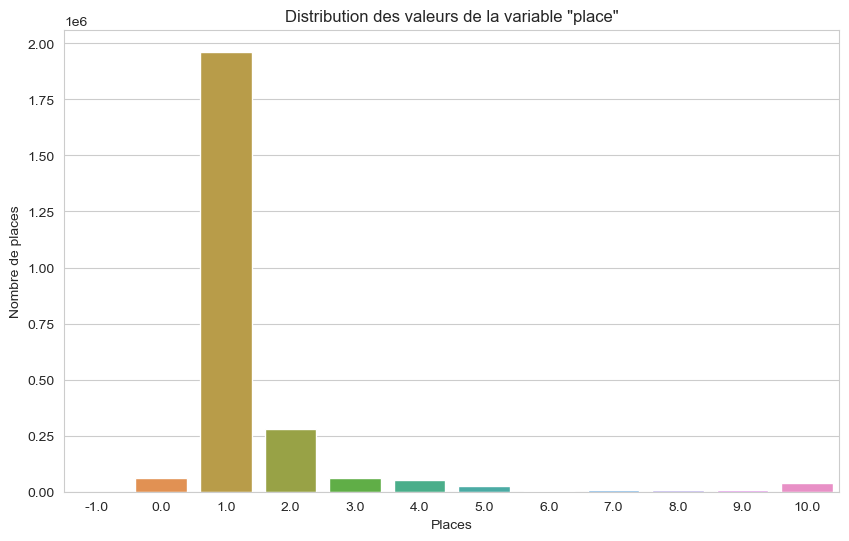

In [31]:
# Réglages de style optionnels
sns.set_style("whitegrid")

# Tracer le graphique de distribution des valeurs de 'place'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='place')
plt.title('Distribution des valeurs de la variable "place"')
plt.xlabel("Places")
plt.ylabel("Nombre de places")
plt.show()

Remplacer les NaN et -1 par mode ou KNN

#### Variable senc

senc  
Sens de circulation :  
-1 – Non renseigné  
0 – Inconnu  
1 – PK ou PR ou numéro d’adresse postale croissant  
2 – PK ou PR ou numéro d’adresse postale décroissant  
3 – Absence de repère  

In [32]:
locp_counts = df['senc'].value_counts()
total_count = len(df['senc'])
print("Valeurs uniques et leur décompte pour la variable 'senc':")
for value, count in locp_counts.items():
    percentage = (count / total_count) * 100
    print(f"{value}: {count} ({percentage:.2f}%)")
    
na_count = df['senc'].isna().sum()
percentage_missing = (na_count / total_count) * 100
print("Nombre de valeurs manquantes pour la variable 'senc':", na_count)
print("Pourcentage de données manquantes pour la variable 'senc': {:.2f}%".format(percentage_missing))


Valeurs uniques et leur décompte pour la variable 'senc':
0.0: 1836193 (69.72%)
1.0: 423868 (16.09%)
2.0: 300129 (11.40%)
3.0: 71450 (2.71%)
-1.0: 1661 (0.06%)
Nombre de valeurs manquantes pour la variable 'senc': 330
Pourcentage de données manquantes pour la variable 'senc': 0.01%


In [ ]:
#Valeurs uniques et leur décompte pour la variable 'senc':
#1: 221710 (44.86%)
#2: 167564 (33.91%)
#3: 71438 (14.46%)
#0: 31814 (6.44%)
#-1: 1656 (0.34%)
#Nombre de valeurs manquantes pour la variable 'senc': 0
#Pourcentage de données manquantes pour la variable 'senc': 0.00%

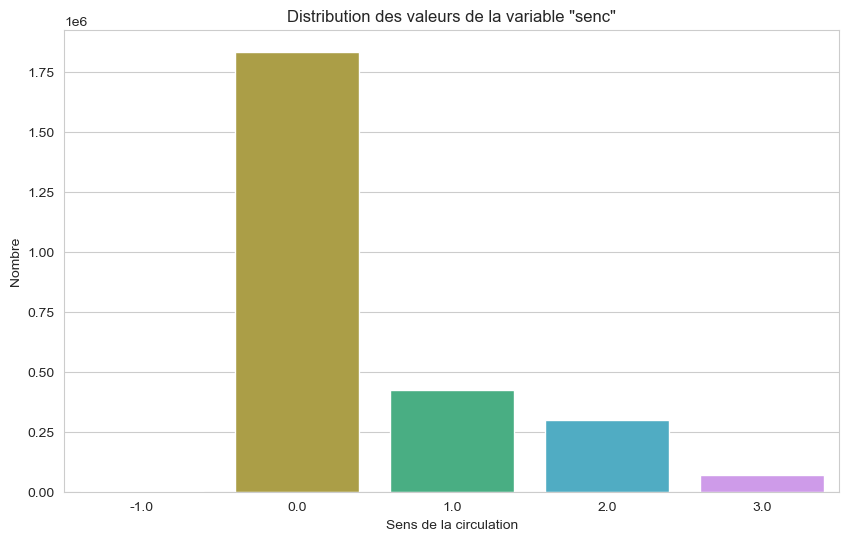

In [33]:
sns.set_style("whitegrid")

# Tracer le graphique de distribution des valeurs de 'senc'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='senc')
plt.title('Distribution des valeurs de la variable "senc"')
plt.xlabel("Sens de la circulation")
plt.ylabel("Nombre")
plt.show()

Sens de la circulation inconnu dans 69,7% des cas : suppression de la variable

#### Variable trajet

trajet  
Motif du déplacement au moment de l’accident :  
-1 – Non renseigné  
0 – Non renseigné  
1 – Domicile – travail  
2 – Domicile – école  
3 – Courses – achats  
4 – Utilisation professionnelle  
5 – Promenade – loisirs  
9 – Autre  

In [34]:
locp_counts = df['trajet'].value_counts()
total_count = len(df['trajet'])
print("Valeurs uniques et leur décompte pour la variable 'trajet':")
for value, count in locp_counts.items():
    percentage = (count / total_count) * 100
    print(f"{value}: {count} ({percentage:.2f}%)")
    
na_count = df['trajet'].isna().sum()
percentage_missing = (na_count / total_count) * 100
print("Nombre de valeurs manquantes pour la variable 'trajet':", na_count)
print("Pourcentage de données manquantes pour la variable 'trajet': {:.2f}%".format(percentage_missing))


Valeurs uniques et leur décompte pour la variable 'trajet':
5.0: 978094 (37.14%)
0.0: 732930 (27.83%)
1.0: 344905 (13.10%)
4.0: 255743 (9.71%)
9.0: 189164 (7.18%)
3.0: 71034 (2.70%)
2.0: 54340 (2.06%)
-1.0: 6927 (0.26%)
Nombre de valeurs manquantes pour la variable 'trajet': 494
Pourcentage de données manquantes pour la variable 'trajet': 0.02%


In [ ]:
#Valeurs uniques et leur décompte pour la variable 'trajet':
#5: 182022 (36.83%)
#0: 126473 (25.59%)
#1: 65777 (13.31%)
#4: 46085 (9.33%)
#9: 40459 (8.19%)
#3: 16057 (3.25%)
#2: 10409 (2.11%)
#-1: 6900 (1.40%)
#Nombre de valeurs manquantes pour la variable 'trajet': 0
#Pourcentage de données manquantes pour la variable 'trajet': 0.00%

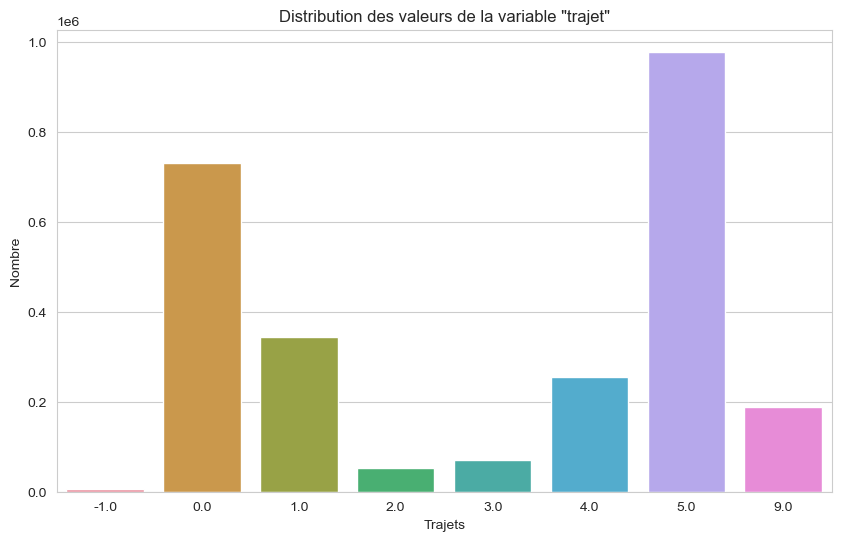

In [35]:
sns.set_style("whitegrid")

# Tracer le graphique de distribution des valeurs de 'trajet'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='trajet')
plt.title('Distribution des valeurs de la variable "trajet"')
plt.xlabel("Trajets")
plt.ylabel("Nombre")
plt.show()

27% de trajet non renseigné ! mais variable importante : on garde ?

#### Variable manv

Manoeuvre principale avant l’accident :  
-1 – Non renseigné  
0 – Inconnue  
1 – Sans changement de direction  
2 – Même sens, même file  
3 – Entre 2 files  
4 – En marche arrière  
5 – A contresens  
6 – En franchissant le terre-plein central  
7 – Dans le couloir bus, dans le même sens  
8 – Dans le couloir bus, dans le sens inverse  
9 – En s’insérant   
10 – En faisant demi-tour sur la chaussée  
Changeant de file  
11 – A gauche  
12 – A droite  
Déporté  
13 – A gauche  
14 – A droite  
Tournant  
15 – A gauche  
16 – A droite  
Dépassant  
17 – A gauche  
18 – A droite  
Divers  
19 – Traversant la chaussée  
20 – Manœuvre de stationnement  
21 – Manœuvre d’évitement  
22 – Ouverture de porte  
23 – Arrêté (hors stationnement)  
24 – En stationnement (avec occupants)  
25 – Circulant sur trottoir  
26 – Autres manœuvres  

In [36]:
locp_counts = df['manv'].value_counts()
total_count = len(df['manv'])
print("Valeurs uniques et leur décompte pour la variable 'manv':")
for value, count in locp_counts.items():
    percentage = (count / total_count) * 100
    print(f"{value}: {count} ({percentage:.2f}%)")
    
na_count = df['manv'].isna().sum()
percentage_missing = (na_count / total_count) * 100
print("Nombre de valeurs manquantes pour la variable 'manv':", na_count)
print("Pourcentage de données manquantes pour la variable 'manv': {:.2f}%".format(percentage_missing))


Valeurs uniques et leur décompte pour la variable 'manv':
1.0: 1188321 (45.12%)
2.0: 289244 (10.98%)
15.0: 214994 (8.16%)
0.0: 195618 (7.43%)
13.0: 111859 (4.25%)
17.0: 85746 (3.26%)
23.0: 67770 (2.57%)
16.0: 61231 (2.32%)
9.0: 56845 (2.16%)
19.0: 53520 (2.03%)
14.0: 49089 (1.86%)
21.0: 43257 (1.64%)
4.0: 27969 (1.06%)
5.0: 25507 (0.97%)
11.0: 24992 (0.95%)
12.0: 20962 (0.80%)
10.0: 20753 (0.79%)
26.0: 17616 (0.67%)
3.0: 17429 (0.66%)
20.0: 14113 (0.54%)
18.0: 11925 (0.45%)
7.0: 10109 (0.38%)
24.0: 9188 (0.35%)
22.0: 6676 (0.25%)
6.0: 5443 (0.21%)
25.0: 1449 (0.06%)
8.0: 1426 (0.05%)
-1.0: 168 (0.01%)
Nombre de valeurs manquantes pour la variable 'manv': 412
Pourcentage de données manquantes pour la variable 'manv': 0.02%


7,4% de manoeuvre inconnue mais variable importante : on garde ?

#### Variable lum

lum  
Lumière : conditions d’éclairage dans lesquelles l'accident s'est produit :  
1 – Plein jour  
2 – Crépuscule ou aube  
3 – Nuit sans éclairage public  
4 – Nuit avec éclairage public non allumé  
5 – Nuit avec éclairage public allumé  

In [37]:
locp_counts = df['lum'].value_counts()
total_count = len(df['lum'])
print("Valeurs uniques et leur décompte pour la variable 'lum':")
for value, count in locp_counts.items():
    percentage = (count / total_count) * 100
    print(f"{value}: {count} ({percentage:.2f}%)")
    
na_count = df['lum'].isna().sum()
percentage_missing = (na_count / total_count) * 100
print("Nombre de valeurs manquantes pour la variable 'lum':", na_count)
print("Pourcentage de données manquantes pour la variable 'lum': {:.2f}%".format(percentage_missing))


Valeurs uniques et leur décompte pour la variable 'lum':
1: 1808413 (68.67%)
5: 422095 (16.03%)
3: 224959 (8.54%)
2: 156461 (5.94%)
4: 21693 (0.82%)
-1: 10 (0.00%)
Nombre de valeurs manquantes pour la variable 'lum': 0
Pourcentage de données manquantes pour la variable 'lum': 0.00%


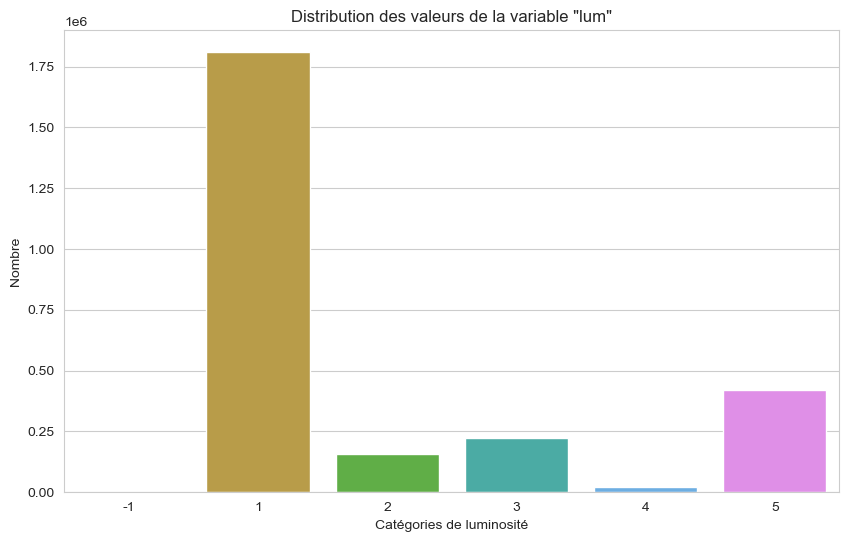

In [38]:
sns.set_style("whitegrid")

# Tracer le graphique de distribution des valeurs de 'lum'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='lum')
plt.title('Distribution des valeurs de la variable "lum"')
plt.xlabel("Catégories de luminosité")
plt.ylabel("Nombre")
plt.show()

#### Variable catv

Catégorie du véhicule :  
00 – Indéterminable  
01 – Bicyclette  
02 – Cyclomoteur <50cm3  
03 – Voiturette (Quadricycle à moteur carrossé) (anciennement "voiturette ou tricycle à moteur")  
04 – Référence inutilisée depuis 2006 (scooter immatriculé)  
05 – Référence inutilisée depuis 2006 (motocyclette)  
06 – Référence inutilisée depuis 2006 (side-car)  
07 – VL seul  
08 – Référence inutilisée depuis 2006 (VL + caravane)  
09 – Référence inutilisée depuis 2006 (VL + remorque)  
10 – VU seul 1,5T <= PTAC <= 3,5T avec ou sans remorque (anciennement VU seul 1,5T <= PTAC<= 3,5T)  
11 – Référence inutilisée depuis 2006 (VU (10) + caravane)  
12 – Référence inutilisée depuis 2006 (VU (10) + remorque)  
13 – PL seul 3,5T <PTCA <= 7,5T  
14 – PL seul > 7,5T  
15 – PL > 3,5T + remorque  
16 – Tracteur routier seul  
17 – Tracteur routier + semi-remorque  
18 – Référence inutilisée depuis 2006 (transport en commun)  
19 – Référence inutilisée depuis 2006 (tramway)  
20 – Engin spécial  
21 – Tracteur agricole  
30 – Scooter < 50 cm3  
31 – Motocyclette > 50 cm3 et <= 125 cm3  
32 – Scooter > 50 cm3 et <= 125 cm3  
33 – Motocyclette > 125 cm3  
34 – Scooter > 125 cm3  
35 – Quad léger <= 50 cm3 (Quadricycle à moteur non carrossé)  
36 – Quad lourd > 50 cm3 (Quadricycle à moteur non carrossé)  
37 – Autobus  
38 – Autocar  
39 – Train  
40 – Tramway  
41 – 3RM <= 50 cm3  
42 – 3RM > 50 cm3 <= 125 cm3  
43 – 3RM > 125 cm3  
50 – EDP à moteur  
60 – EDP sans moteur  
80 – VAE  
99 – Autre véhicule  

In [40]:
locp_counts = df['catv'].value_counts()
total_count = len(df['catv'])
print("Valeurs uniques et leur décompte pour la variable 'catv':")
for value, count in locp_counts.items():
    percentage = (count / total_count) * 100
    print(f"{value}: {count} ({percentage:.2f}%)")
    
na_count = df['catv'].isna().sum()
percentage_missing = (na_count / total_count) * 100
print("Nombre de valeurs manquantes pour la variable 'catv':", na_count)
print("Pourcentage de données manquantes pour la variable 'catv': {:.2f}%".format(percentage_missing))


Valeurs uniques et leur décompte pour la variable 'catv':
7: 1709692 (64.92%)
33: 164278 (6.24%)
10: 140957 (5.35%)
2: 120381 (4.57%)
1: 94187 (3.58%)
30: 93189 (3.54%)
32: 48991 (1.86%)
31: 45789 (1.74%)
5: 25295 (0.96%)
34: 25189 (0.96%)
37: 23932 (0.91%)
14: 23580 (0.90%)
15: 18373 (0.70%)
17: 16986 (0.64%)
3: 11204 (0.43%)
99: 9727 (0.37%)
4: 9143 (0.35%)
13: 9122 (0.35%)
38: 9105 (0.35%)
50: 5820 (0.22%)
21: 4575 (0.17%)
18: 4098 (0.16%)
40: 3656 (0.14%)
36: 3426 (0.13%)
20: 3040 (0.12%)
43: 2383 (0.09%)
80: 1949 (0.07%)
0: 1075 (0.04%)
16: 982 (0.04%)
60: 804 (0.03%)
39: 796 (0.03%)
35: 651 (0.02%)
9: 460 (0.02%)
19: 262 (0.01%)
8: 198 (0.01%)
12: 109 (0.00%)
42: 95 (0.00%)
41: 60 (0.00%)
6: 39 (0.00%)
11: 20 (0.00%)
-1: 13 (0.00%)
Nombre de valeurs manquantes pour la variable 'catv': 0
Pourcentage de données manquantes pour la variable 'catv': 0.00%


#### Variable int

int  
Intersection :  
1 – Hors intersection  
2 – Intersection en X  
3 – Intersection en T  
4 – Intersection en Y  
5 – Intersection à plus de 4 branches  
6 – Giratoire  
7 – Place  
8 – Passage à niveau  
9 – Autre intersection  

In [41]:
locp_counts = df['int'].value_counts()
total_count = len(df['int'])
print("Valeurs uniques et leur décompte pour la variable 'int':")
for value, count in locp_counts.items():
    percentage = (count / total_count) * 100
    print(f"{value}: {count} ({percentage:.2f}%)")
    
na_count = df['int'].isna().sum()
percentage_missing = (na_count / total_count) * 100
print("Nombre de valeurs manquantes pour la variable 'int':", na_count)
print("Pourcentage de données manquantes pour la variable 'int': {:.2f}%".format(percentage_missing))


Valeurs uniques et leur décompte pour la variable 'int':
1: 1822959 (69.22%)
2: 339696 (12.90%)
3: 246378 (9.36%)
6: 73902 (2.81%)
9: 59737 (2.27%)
4: 41779 (1.59%)
5: 24459 (0.93%)
7: 20976 (0.80%)
8: 3470 (0.13%)
0: 254 (0.01%)
-1: 21 (0.00%)
Nombre de valeurs manquantes pour la variable 'int': 0
Pourcentage de données manquantes pour la variable 'int': 0.00%


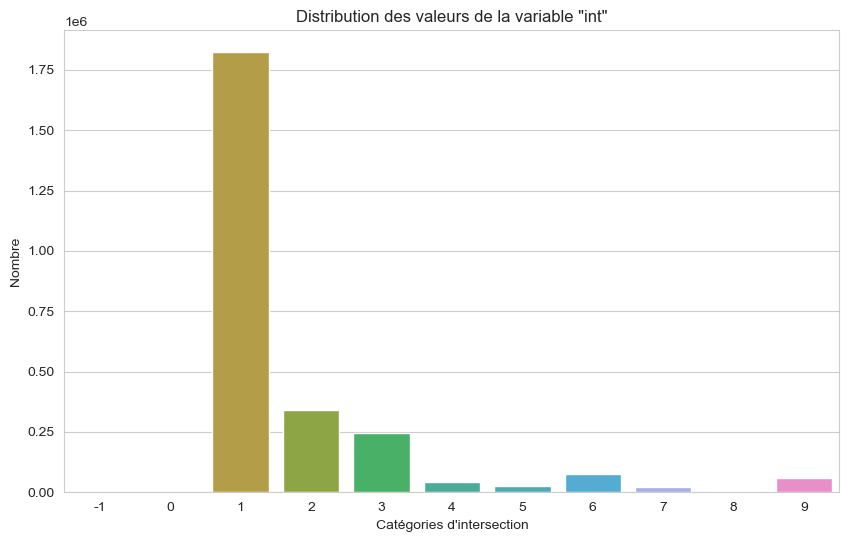

In [42]:
sns.set_style("whitegrid")

# Tracer le graphique de distribution des valeurs de 'int'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='int')
plt.title('Distribution des valeurs de la variable "int"')
plt.xlabel("Catégories d'intersection")
plt.ylabel("Nombre")
plt.show()

#### Variable catr

In [43]:
locp_counts = df['catr'].value_counts()
total_count = len(df['catr'])
print("Valeurs uniques et leur décompte pour la variable 'catr':")
for value, count in locp_counts.items():
    percentage = (count / total_count) * 100
    print(f"{value}: {count} ({percentage:.2f}%)")
    
na_count = df['catr'].isna().sum()
percentage_missing = (na_count / total_count) * 100
print("Nombre de valeurs manquantes pour la variable 'catr':", na_count)
print("Pourcentage de données manquantes pour la variable 'catr': {:.2f}%".format(percentage_missing))


Valeurs uniques et leur décompte pour la variable 'catr':
4.0: 1218544 (46.27%)
3.0: 872730 (33.14%)
1.0: 243110 (9.23%)
2.0: 222187 (8.44%)
9.0: 39207 (1.49%)
7.0: 16975 (0.64%)
6.0: 16846 (0.64%)
5.0: 4030 (0.15%)
Nombre de valeurs manquantes pour la variable 'catr': 2
Pourcentage de données manquantes pour la variable 'catr': 0.00%


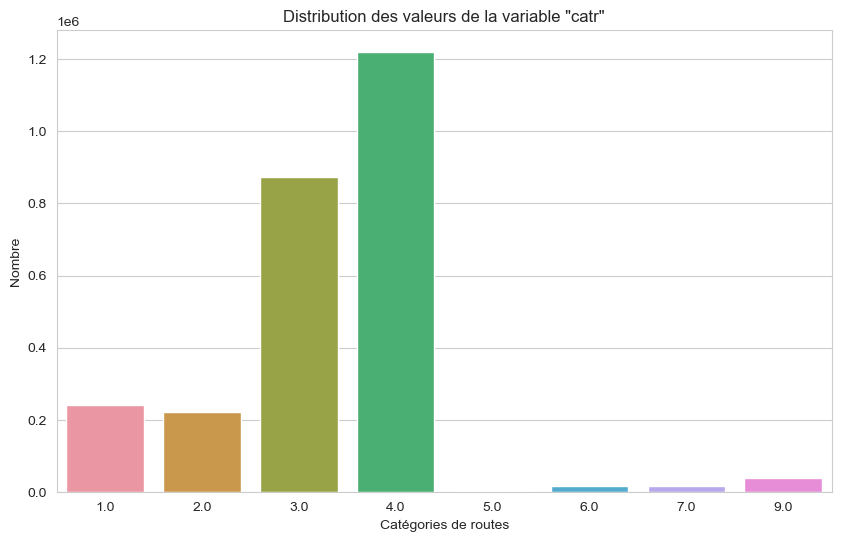

In [44]:
sns.set_style("whitegrid")

# Tracer le graphique de distribution des valeurs de 'catr'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='catr')
plt.title('Distribution des valeurs de la variable "catr"')
plt.xlabel("Catégories de routes")
plt.ylabel("Nombre")
plt.show()

#### Variable catu

In [45]:
locp_counts = df['catu'].value_counts()
total_count = len(df['catu'])
print("Valeurs uniques et leur décompte pour la variable 'catu':")
for value, count in locp_counts.items():
    percentage = (count / total_count) * 100
    print(f"{value}: {count} ({percentage:.2f}%)")
    
na_count = df['catu'].isna().sum()
percentage_missing = (na_count / total_count) * 100
print("Nombre de valeurs manquantes pour la variable 'catu':", na_count)
print("Pourcentage de données manquantes pour la variable 'catu': {:.2f}%".format(percentage_missing))


Valeurs uniques et leur décompte pour la variable 'catu':
1: 1961586 (74.48%)
2: 452369 (17.18%)
3: 216119 (8.21%)
4: 3557 (0.14%)
Nombre de valeurs manquantes pour la variable 'catu': 0
Pourcentage de données manquantes pour la variable 'catu': 0.00%


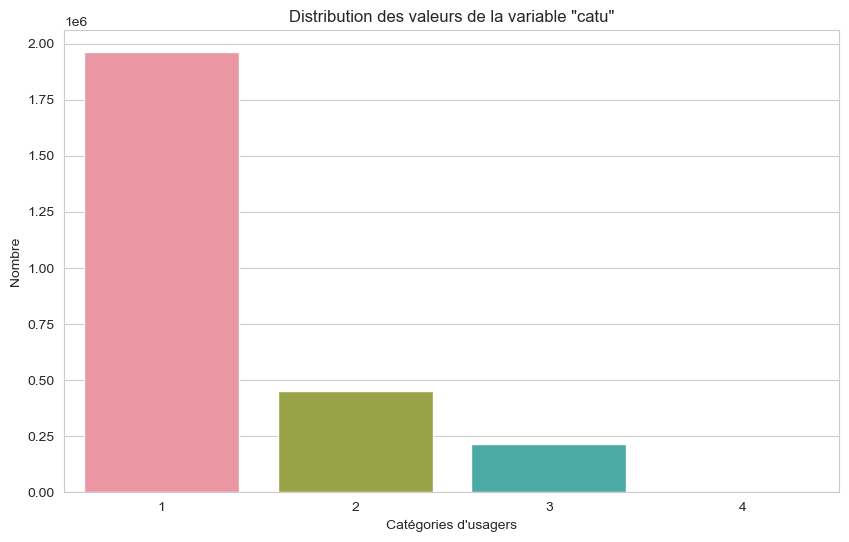

In [46]:
sns.set_style("whitegrid")

# Tracer le graphique de distribution des valeurs de 'catu'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='catu')
plt.title('Distribution des valeurs de la variable "catu"')
plt.xlabel("Catégories d'usagers")
plt.ylabel("Nombre")
plt.show()

#### Variable sexe

In [47]:
locp_counts = df['sexe'].value_counts()
total_count = len(df['sexe'])
print("Valeurs uniques et leur décompte pour la variable 'sexe':")
for value, count in locp_counts.items():
    percentage = (count / total_count) * 100
    print(f"{value}: {count} ({percentage:.2f}%)")
    
na_count = df['sexe'].isna().sum()
percentage_missing = (na_count / total_count) * 100
print("Nombre de valeurs manquantes pour la variable 'sexe':", na_count)
print("Pourcentage de données manquantes pour la variable 'sexe': {:.2f}%".format(percentage_missing))


Valeurs uniques et leur décompte pour la variable 'sexe':
1: 1771811 (67.28%)
2: 856014 (32.50%)
-1: 5806 (0.22%)
Nombre de valeurs manquantes pour la variable 'sexe': 0
Pourcentage de données manquantes pour la variable 'sexe': 0.00%


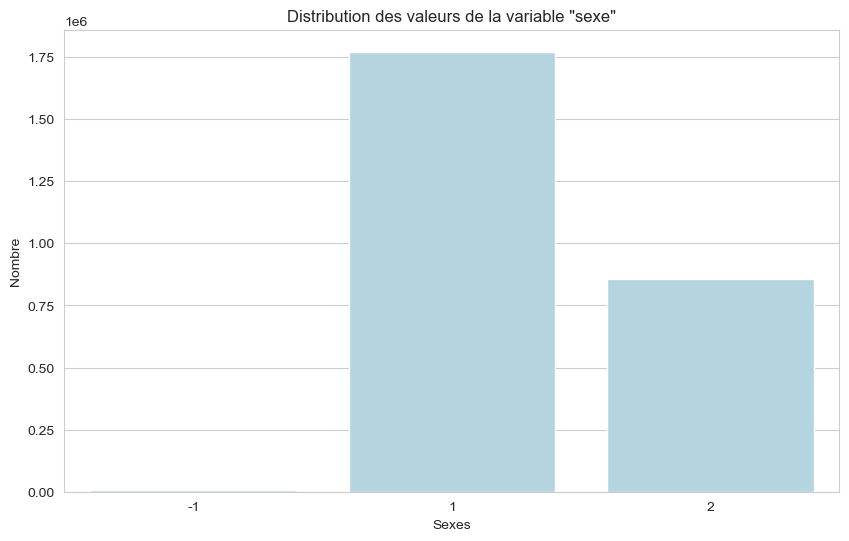

In [53]:
sns.set_style("whitegrid")

# Tracer le graphique de distribution des valeurs de 'sexe'
palette = ["lightblue"]
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='sexe', palette = palette)
plt.title('Distribution des valeurs de la variable "sexe"')
plt.xlabel("Sexes")
plt.ylabel("Nombre")
plt.show()

   grav  proportion_femmes  proportion_hommes
0     1           0.354575           0.435868
1     2           0.019284           0.030530
2     3           0.190812           0.201550
3     4           0.435329           0.332051


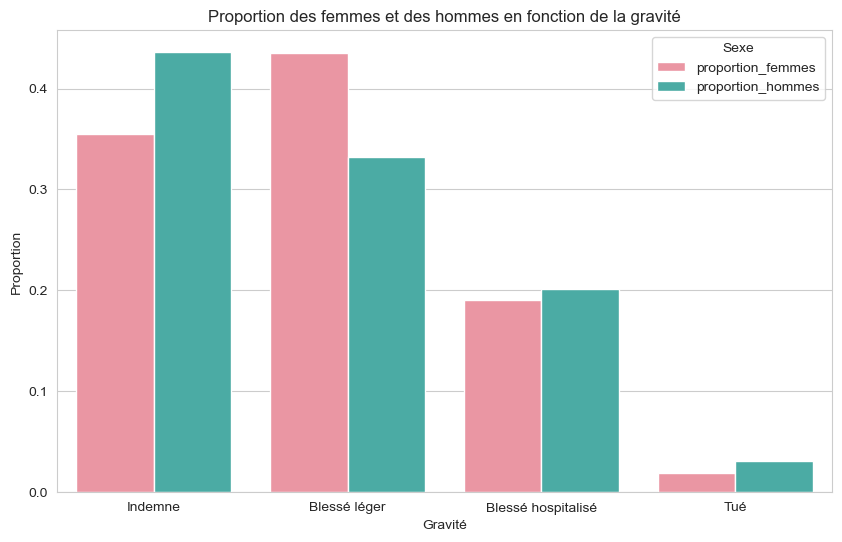

In [60]:
# Calculer le nombre total d'accidents par sexe
total_accidents_by_sex = df.groupby('sexe').size().reset_index(name='total_accidents_sexe')

# Calculer le nombre total d'accidents par gravité et sexe
total_accidents = df.groupby(['grav', 'sexe']).size().reset_index(name='total_accidents')

# Fusionner les données pour les hommes et les femmes sur la gravité
merged_data = pd.merge(total_accidents, total_accidents_by_sex, on='sexe')

# Calculer la proportion de chaque sexe pour chaque classe de gravité
merged_data['proportion'] = merged_data['total_accidents'] / merged_data['total_accidents_sexe']

# Filtrer les données pour les femmes
females_data = merged_data[merged_data['sexe'] == 2]

# Filtrer les données pour les hommes
males_data = merged_data[merged_data['sexe'] == 1]

# Créer un DataFrame pour les femmes avec les proportions
df_sexe_femmes = females_data[['grav', 'proportion']].rename(columns={'proportion': 'proportion_femmes'})

# Créer un DataFrame pour les hommes avec les proportions
df_sexe_hommes = males_data[['grav', 'proportion']].rename(columns={'proportion': 'proportion_hommes'})

# Fusionner les DataFrames
df_sexe = pd.merge(df_sexe_femmes, df_sexe_hommes, on='grav')

# Afficher le DataFrame résultant
print(df_sexe)

# Définir l'ordre d'apparition des classes de gravité
order = [1, 4, 3, 2]

# Créer un DataFrame pour seaborn
df_seaborn = pd.melt(df_sexe, id_vars=['grav'], var_name='sexe', value_name='proportion')

# Créer le graphique avec seaborn en spécifiant l'ordre des classes de gravité
plt.figure(figsize=(10, 6))
sns.barplot(data=df_seaborn, x='grav', y='proportion', hue='sexe', order=order)

# Ajouter un titre et des étiquettes aux axes
plt.xlabel('Gravité')
plt.ylabel('Proportion')
plt.title('Proportion des femmes et des hommes en fonction de la gravité')

# Renommer les labels de l'axe x
plt.xticks(ticks=range(4), labels=['Indemne', 'Blessé léger', 'Blessé hospitalisé', 'Tué'])

# Afficher la légende
plt.legend(title='Sexe')

# Afficher le graphique
plt.show()

#### secu1

In [62]:
locp_counts = df['secu1'].value_counts()
total_count = len(df['secu1'])
print("Valeurs uniques et leur décompte pour la variable 'secu1':")
for value, count in locp_counts.items():
    percentage = (count / total_count) * 100
    print(f"{value}: {count} ({percentage:.2f}%)")
    
na_count = df['secu1'].isna().sum()
percentage_missing = (na_count / total_count) * 100
print("Nombre de valeurs manquantes pour la variable 'secu1':", na_count)
print("Pourcentage de données manquantes pour la variable 'secu1': {:.2f}%".format(percentage_missing))


Valeurs uniques et leur décompte pour la variable 'secu1':
1.0: 292337 (11.10%)
2.0: 91318 (3.47%)
8.0: 59096 (2.24%)
0.0: 41147 (1.56%)
-1.0: 5591 (0.21%)
3.0: 3158 (0.12%)
9.0: 538 (0.02%)
6.0: 399 (0.02%)
4.0: 334 (0.01%)
5.0: 219 (0.01%)
7.0: 15 (0.00%)
Nombre de valeurs manquantes pour la variable 'secu1': 2139479
Pourcentage de données manquantes pour la variable 'secu1': 81.24%


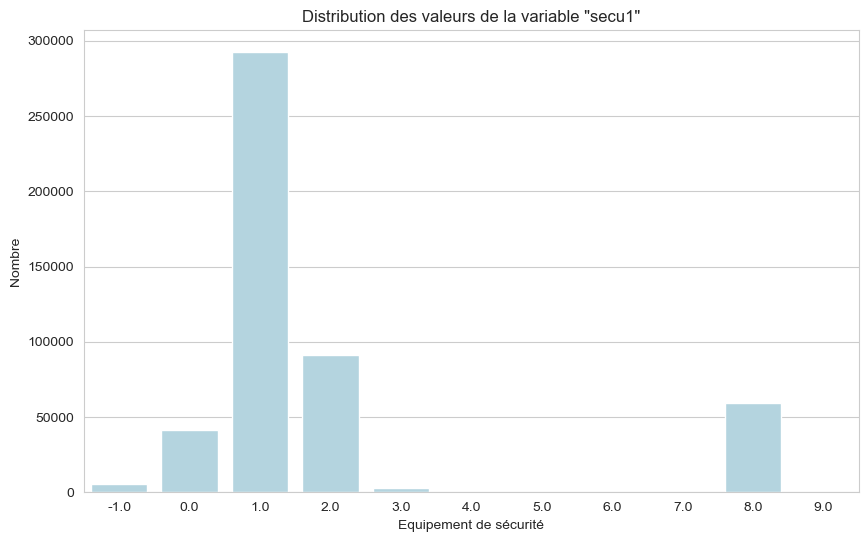

In [63]:
sns.set_style("whitegrid")

# Tracer le graphique de distribution des valeurs de 'secu1'
palette = ["lightblue"]
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='secu1', palette = palette)
plt.title('Distribution des valeurs de la variable "secu1"')
plt.xlabel("Equipement de sécurité")
plt.ylabel("Nombre")
plt.show()

#### secu2

In [65]:
locp_counts = df['secu2'].value_counts()
total_count = len(df['secu2'])
print("Valeurs uniques et leur décompte pour la variable 'secu2':")
for value, count in locp_counts.items():
    percentage = (count / total_count) * 100
    print(f"{value}: {count} ({percentage:.2f}%)")
    
na_count = df['secu2'].isna().sum()
percentage_missing = (na_count / total_count) * 100
print("Nombre de valeurs manquantes pour la variable 'secu2':", na_count)
print("Pourcentage de données manquantes pour la variable 'secu2': {:.2f}%".format(percentage_missing))


Valeurs uniques et leur décompte pour la variable 'secu2':
-1.0: 193468 (7.35%)
0.0: 189785 (7.21%)
8.0: 50943 (1.93%)
6.0: 44903 (1.70%)
5.0: 5778 (0.22%)
4.0: 4845 (0.18%)
9.0: 1482 (0.06%)
1.0: 896 (0.03%)
2.0: 841 (0.03%)
7.0: 656 (0.02%)
3.0: 555 (0.02%)
Nombre de valeurs manquantes pour la variable 'secu2': 2139479
Pourcentage de données manquantes pour la variable 'secu2': 81.24%


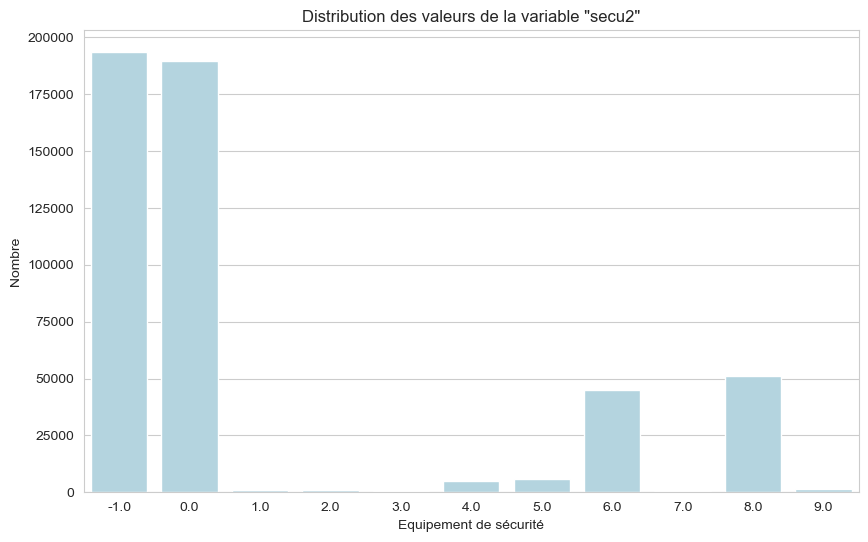

In [66]:
sns.set_style("whitegrid")

# Tracer le graphique de distribution des valeurs de 'secu2'
palette = ["lightblue"]
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='secu2', palette = palette)
plt.title('Distribution des valeurs de la variable "secu2"')
plt.xlabel("Equipement de sécurité")
plt.ylabel("Nombre")
plt.show()

#### secu3

In [67]:
locp_counts = df['secu3'].value_counts()
total_count = len(df['secu3'])
print("Valeurs uniques et leur décompte pour la variable 'secu3':")
for value, count in locp_counts.items():
    percentage = (count / total_count) * 100
    print(f"{value}: {count} ({percentage:.2f}%)")
    
na_count = df['secu3'].isna().sum()
percentage_missing = (na_count / total_count) * 100
print("Nombre de valeurs manquantes pour la variable 'secu3':", na_count)
print("Pourcentage de données manquantes pour la variable 'secu3': {:.2f}%".format(percentage_missing))


Valeurs uniques et leur décompte pour la variable 'secu3':
-1.0: 488540 (18.55%)
9.0: 3550 (0.13%)
0.0: 1346 (0.05%)
6.0: 250 (0.01%)
8.0: 236 (0.01%)
1.0: 87 (0.00%)
4.0: 71 (0.00%)
5.0: 38 (0.00%)
2.0: 15 (0.00%)
7.0: 12 (0.00%)
3.0: 7 (0.00%)
Nombre de valeurs manquantes pour la variable 'secu3': 2139479
Pourcentage de données manquantes pour la variable 'secu3': 81.24%


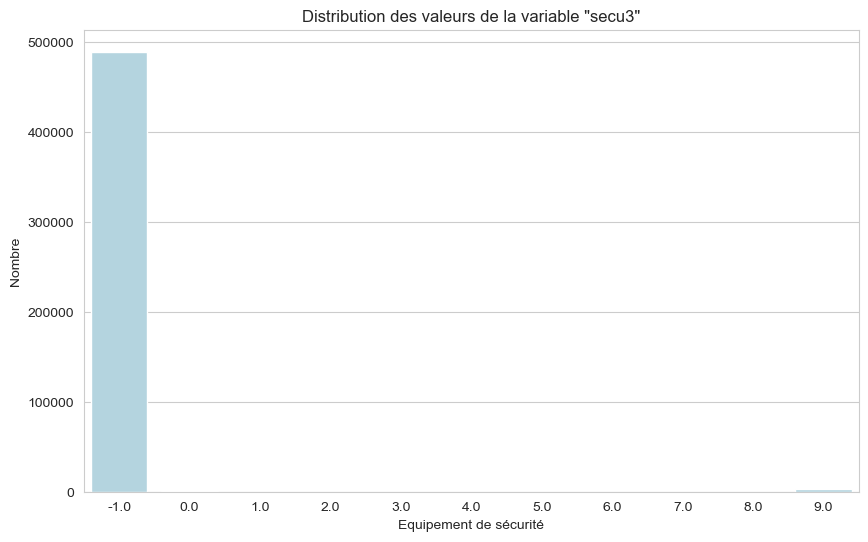

In [68]:
sns.set_style("whitegrid")

# Tracer le graphique de distribution des valeurs de 'secu3'
palette = ["lightblue"]
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='secu3', palette = palette)
plt.title('Distribution des valeurs de la variable "secu3"')
plt.xlabel("Equipement de sécurité")
plt.ylabel("Nombre")
plt.show()

#### Variable actp

In [69]:
locp_counts = df['actp'].value_counts()
total_count = len(df['actp'])
print("Valeurs uniques et leur décompte pour la variable 'actp':")
for value, count in locp_counts.items():
    percentage = (count / total_count) * 100
    print(f"{value}: {count} ({percentage:.2f}%)")
    
na_count = df['actp'].isna().sum()
percentage_missing = (na_count / total_count) * 100
print("Nombre de valeurs manquantes pour la variable 'actp':", na_count)
print("Pourcentage de données manquantes pour la variable 'actp': {:.2f}%".format(percentage_missing))


Valeurs uniques et leur décompte pour la variable 'actp':
0.0: 1906822 (72.40%)
0: 270483 (10.27%)
 -1: 185690 (7.05%)
3.0: 130470 (4.95%)
3: 27886 (1.06%)
9.0: 12105 (0.46%)
5.0: 10287 (0.39%)
1.0: 9626 (0.37%)
2.0: 4780 (0.18%)
0.0: 4359 (0.17%)
4.0: 3198 (0.12%)
9: 2529 (0.10%)
1: 2470 (0.09%)
5: 1528 (0.06%)
B: 1234 (0.05%)
2: 1161 (0.04%)
3.0: 686 (0.03%)
4: 531 (0.02%)
A: 422 (0.02%)
6.0: 408 (0.02%)
6: 106 (0.00%)
5.0: 85 (0.00%)
1.0: 75 (0.00%)
9.0: 64 (0.00%)
7: 60 (0.00%)
8: 52 (0.00%)
4.0: 36 (0.00%)
2.0: 29 (0.00%)
Nombre de valeurs manquantes pour la variable 'actp': 56449
Pourcentage de données manquantes pour la variable 'actp': 2.14%


#### Variable obs

In [70]:
locp_counts = df['obs'].value_counts()
total_count = len(df['obs'])
print("Valeurs uniques et leur décompte pour la variable 'obs':")
for value, count in locp_counts.items():
    percentage = (count / total_count) * 100
    print(f"{value}: {count} ({percentage:.2f}%)")
    
na_count = df['obs'].isna().sum()
percentage_missing = (na_count / total_count) * 100
print("Nombre de valeurs manquantes pour la variable 'obs':", na_count)
print("Pourcentage de données manquantes pour la variable 'obs': {:.2f}%".format(percentage_missing))


Valeurs uniques et leur décompte pour la variable 'obs':
0.0: 2241807 (85.12%)
1.0: 57922 (2.20%)
13.0: 54047 (2.05%)
2.0: 45096 (1.71%)
3.0: 35234 (1.34%)
6.0: 34835 (1.32%)
4.0: 34834 (1.32%)
8.0: 31707 (1.20%)
14.0: 19130 (0.73%)
12.0: 16048 (0.61%)
16.0: 14824 (0.56%)
15.0: 14603 (0.55%)
9.0: 10545 (0.40%)
7.0: 6940 (0.26%)
11.0: 6321 (0.24%)
5.0: 4297 (0.16%)
10.0: 3557 (0.14%)
17.0: 628 (0.02%)
-1.0: 195 (0.01%)
Nombre de valeurs manquantes pour la variable 'obs': 1061
Pourcentage de données manquantes pour la variable 'obs': 0.04%


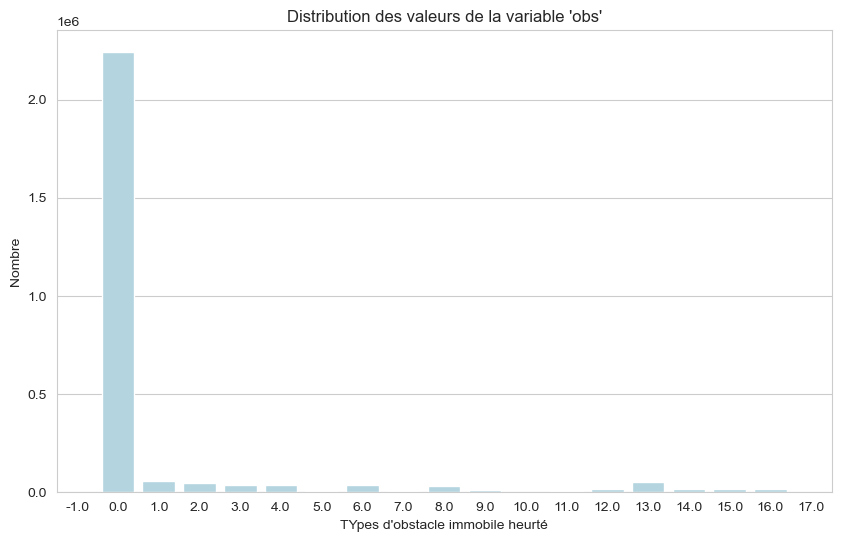

In [96]:
sns.set_style("whitegrid")

# Tracer le graphique de distribution des valeurs de 'obs'
palette = ["lightblue"]
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='obs', palette = palette)
plt.title("Distribution des valeurs de la variable 'obs'")
plt.xlabel("TYpes d'obstacle immobile heurté")
plt.ylabel("Nombre")
plt.show()

#### Variable obsm

In [72]:
locp_counts = df['obsm'].value_counts()
total_count = len(df['obsm'])
print("Valeurs uniques et leur décompte pour la variable 'obsm':")
for value, count in locp_counts.items():
    percentage = (count / total_count) * 100
    print(f"{value}: {count} ({percentage:.2f}%)")
    
na_count = df['obsm'].isna().sum()
percentage_missing = (na_count / total_count) * 100
print("Nombre de valeurs manquantes pour la variable 'obsm':", na_count)
print("Pourcentage de données manquantes pour la variable 'obsm': {:.2f}%".format(percentage_missing))


Valeurs uniques et leur décompte pour la variable 'obsm':
2.0: 1621963 (61.59%)
0.0: 558191 (21.19%)
1.0: 409987 (15.57%)
9.0: 32497 (1.23%)
6.0: 4981 (0.19%)
4.0: 2526 (0.10%)
5.0: 2383 (0.09%)
-1.0: 249 (0.01%)
Nombre de valeurs manquantes pour la variable 'obsm': 854
Pourcentage de données manquantes pour la variable 'obsm': 0.03%


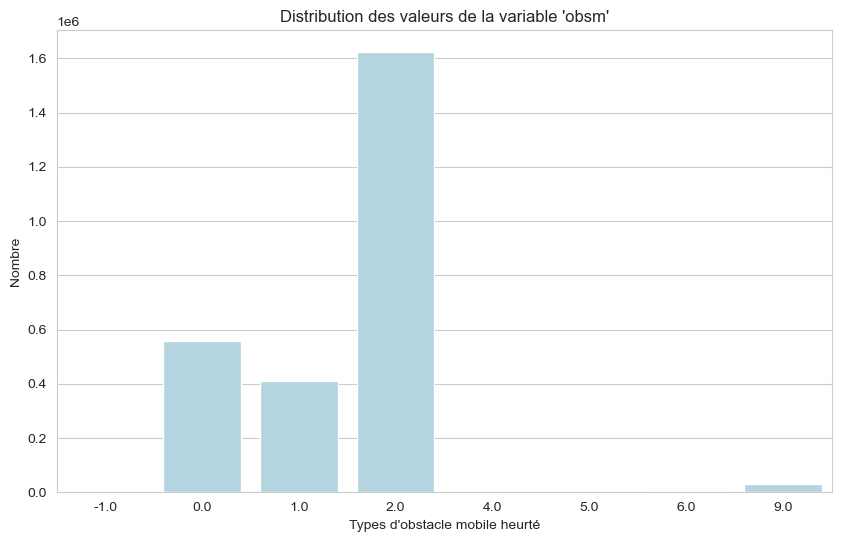

In [95]:
sns.set_style("whitegrid")

# Tracer le graphique de distribution des valeurs de 'obsm'
palette = ["lightblue"]
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='obsm', palette = palette)
plt.title("Distribution des valeurs de la variable 'obsm'")
plt.xlabel("Types d'obstacle mobile heurté")
plt.ylabel("Nombre")
plt.show()

#### Variable nbv

In [74]:
locp_counts = df['nbv'].value_counts()
total_count = len(df['nbv'])
print("Valeurs uniques et leur décompte pour la variable 'nbv':")
for value, count in locp_counts.items():
    percentage = (count / total_count) * 100
    print(f"{value}: {count} ({percentage:.2f}%)")
    
na_count = df['nbv'].isna().sum()
percentage_missing = (na_count / total_count) * 100
print("Nombre de valeurs manquantes pour la variable 'nbv':", na_count)
print("Pourcentage de données manquantes pour la variable 'nbv': {:.2f}%".format(percentage_missing))


Valeurs uniques et leur décompte pour la variable 'nbv':
2.0: 1475914 (56.04%)
1.0: 283301 (10.76%)
4.0: 269765 (10.24%)
0.0: 248164 (9.42%)
3.0: 220600 (8.38%)
6.0: 55315 (2.10%)
5.0: 31621 (1.20%)
8.0: 11853 (0.45%)
2: 9797 (0.37%)
-1.0: 4640 (0.18%)
7.0: 4140 (0.16%)
10.0: 2394 (0.09%)
4: 2172 (0.08%)
1: 1513 (0.06%)
3: 1402 (0.05%)
9.0: 1309 (0.05%)
6: 530 (0.02%)
20.0: 514 (0.02%)
11.0: 363 (0.01%)
12.0: 347 (0.01%)
50.0: 337 (0.01%)
5: 330 (0.01%)
0: 312 (0.01%)
 -1: 148 (0.01%)
8: 121 (0.00%)
30.0: 75 (0.00%)
40.0: 66 (0.00%)
13.0: 47 (0.00%)
25.0: 42 (0.00%)
10: 35 (0.00%)
14.0: 23 (0.00%)
21.0: 22 (0.00%)
26.0: 21 (0.00%)
15.0: 15 (0.00%)
24.0: 14 (0.00%)
7: 14 (0.00%)
90.0: 13 (0.00%)
70.0: 12 (0.00%)
22.0: 11 (0.00%)
31.0: 8 (0.00%)
60.0: 7 (0.00%)
9: 5 (0.00%)
45.0: 4 (0.00%)
17.0: 4 (0.00%)
16.0: 4 (0.00%)
33.0: 3 (0.00%)
36.0: 3 (0.00%)
91.0: 3 (0.00%)
27.0: 3 (0.00%)
86.0: 3 (0.00%)
53.0: 3 (0.00%)
28.0: 2 (0.00%)
52.0: 2 (0.00%)
#ERREUR: 2 (0.00%)
62.0: 2 (0.00%)
39.0: 

#### Variable place

In [82]:
locp_counts = df['place'].value_counts()
total_count = len(df['place'])
print("Valeurs uniques et leur décompte pour la variable 'place':")
for value, count in locp_counts.items():
    percentage = (count / total_count) * 100
    print(f"{value}: {count} ({percentage:.2f}%)")
    
na_count = df['place'].isna().sum()
percentage_missing = (na_count / total_count) * 100
print("Nombre de valeurs manquantes pour la variable 'place':", na_count)
print("Pourcentage de données manquantes pour la variable 'place': {:.2f}%".format(percentage_missing))

Valeurs uniques et leur décompte pour la variable 'place':
1.0: 1962621 (74.52%)
2.0: 281710 (10.70%)
0.0: 60563 (2.30%)
3.0: 60172 (2.28%)
4.0: 52048 (1.98%)
10.0: 38550 (1.46%)
5.0: 26569 (1.01%)
7.0: 9142 (0.35%)
9.0: 8998 (0.34%)
8.0: 7864 (0.30%)
6.0: 2633 (0.10%)
-1.0: 25 (0.00%)
Nombre de valeurs manquantes pour la variable 'place': 122736
Pourcentage de données manquantes pour la variable 'place': 4.66%


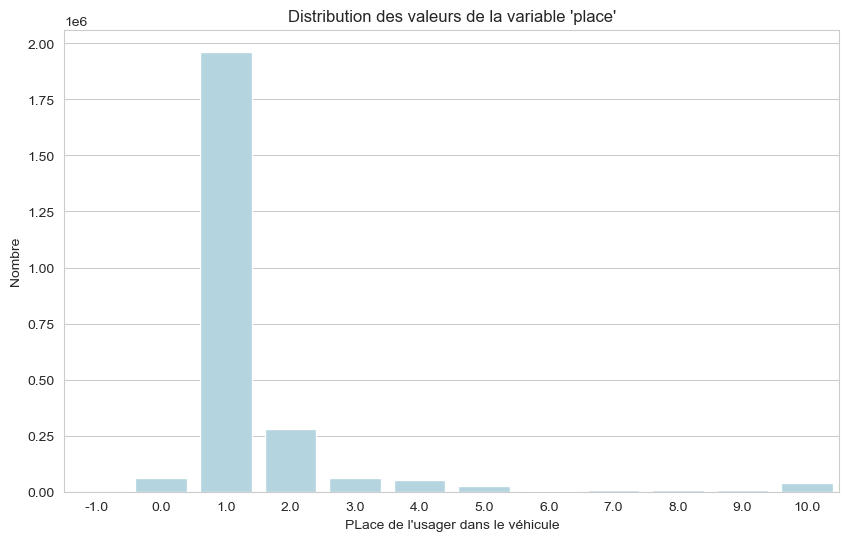

In [83]:
sns.set_style("whitegrid")

# Tracer le graphique de distribution des valeurs de 'place'
palette = ["lightblue"]
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='place', palette = palette)
plt.title("Distribution des valeurs de la variable 'place'")
plt.xlabel("PLace de l'usager dans le véhicule")
plt.ylabel("Nombre")
plt.show()

#### Variable secu

In [84]:
locp_counts = df['secu'].value_counts()
total_count = len(df['secu'])
print("Valeurs uniques et leur décompte pour la variable 'secu':")
for value, count in locp_counts.items():
    percentage = (count / total_count) * 100
    print(f"{value}: {count} ({percentage:.2f}%)")
    
na_count = df['secu'].isna().sum()
percentage_missing = (na_count / total_count) * 100
print("Nombre de valeurs manquantes pour la variable 'secu':", na_count)
print("Pourcentage de données manquantes pour la variable 'secu': {:.2f}%".format(percentage_missing))

Valeurs uniques et leur décompte pour la variable 'secu':
11.0: 1196478 (45.43%)
21.0: 389501 (14.79%)
13.0: 166612 (6.33%)
93.0: 104844 (3.98%)
0.0: 67900 (2.58%)
23.0: 40861 (1.55%)
12.0: 35971 (1.37%)
22.0: 22371 (0.85%)
31.0: 14960 (0.57%)
3.0: 7680 (0.29%)
92.0: 7677 (0.29%)
91.0: 7646 (0.29%)
10.0: 5591 (0.21%)
1.0: 3522 (0.13%)
2.0: 2664 (0.10%)
41.0: 2532 (0.10%)
43.0: 2003 (0.08%)
42.0: 1853 (0.07%)
33.0: 837 (0.03%)
32.0: 760 (0.03%)
20.0: 754 (0.03%)
90.0: 73 (0.00%)
30.0: 9 (0.00%)
40.0: 2 (0.00%)
Nombre de valeurs manquantes pour la variable 'secu': 550530
Pourcentage de données manquantes pour la variable 'secu': 20.90%


#### Variable occutc

In [85]:
locp_counts = df['occutc'].value_counts()
total_count = len(df['occutc'])
print("Valeurs uniques et leur décompte pour la variable 'occutc':")
for value, count in locp_counts.items():
    percentage = (count / total_count) * 100
    print(f"{value}: {count} ({percentage:.2f}%)")
    
na_count = df['occutc'].isna().sum()
percentage_missing = (na_count / total_count) * 100
print("Nombre de valeurs manquantes pour la variable 'occutc':", na_count)
print("Pourcentage de données manquantes pour la variable 'occutc': {:.2f}%".format(percentage_missing))

Valeurs uniques et leur décompte pour la variable 'occutc':
0.0: 2117526 (80.40%)
1.0: 10557 (0.40%)
2.0: 2108 (0.08%)
3.0: 1456 (0.06%)
10.0: 1361 (0.05%)
4.0: 873 (0.03%)
5.0: 830 (0.03%)
15.0: 791 (0.03%)
20.0: 756 (0.03%)
30.0: 611 (0.02%)
6.0: 487 (0.02%)
50.0: 450 (0.02%)
9.0: 402 (0.02%)
7.0: 390 (0.01%)
12.0: 340 (0.01%)
8.0: 328 (0.01%)
40.0: 303 (0.01%)
11.0: 291 (0.01%)
25.0: 289 (0.01%)
26.0: 227 (0.01%)
17.0: 221 (0.01%)
16.0: 210 (0.01%)
45.0: 204 (0.01%)
41.0: 201 (0.01%)
18.0: 200 (0.01%)
35.0: 187 (0.01%)
14.0: 182 (0.01%)
27.0: 170 (0.01%)
21.0: 158 (0.01%)
13.0: 157 (0.01%)
28.0: 156 (0.01%)
32.0: 150 (0.01%)
46.0: 139 (0.01%)
44.0: 139 (0.01%)
24.0: 132 (0.01%)
37.0: 132 (0.01%)
31.0: 126 (0.00%)
60.0: 121 (0.00%)
23.0: 118 (0.00%)
38.0: 117 (0.00%)
22.0: 116 (0.00%)
52.0: 112 (0.00%)
36.0: 102 (0.00%)
39.0: 101 (0.00%)
19.0: 90 (0.00%)
29.0: 90 (0.00%)
55.0: 86 (0.00%)
49.0: 84 (0.00%)
62.0: 82 (0.00%)
42.0: 75 (0.00%)
34.0: 72 (0.00%)
47.0: 71 (0.00%)
33.0: 70 (0.

#### Variable choc

In [91]:
locp_counts = df['choc'].value_counts()
total_count = len(df['choc'])
print("Valeurs uniques et leur décompte pour la variable 'choc':")
for value, count in locp_counts.items():
    percentage = (count / total_count) * 100
    print(f"{value}: {count} ({percentage:.2f}%)")
    
na_count = df['choc'].isna().sum()
percentage_missing = (na_count / total_count) * 100
print("Nombre de valeurs manquantes pour la variable 'choc':", na_count)
print("Pourcentage de données manquantes pour la variable 'choc': {:.2f}%".format(percentage_missing))

Valeurs uniques et leur décompte pour la variable 'choc':
1.0: 976810 (37.09%)
3.0: 383753 (14.57%)
2.0: 328489 (12.47%)
4.0: 249973 (9.49%)
8.0: 179416 (6.81%)
7.0: 158018 (6.00%)
0.0: 154301 (5.86%)
6.0: 86839 (3.30%)
5.0: 68283 (2.59%)
9.0: 47203 (1.79%)
-1.0: 242 (0.01%)
Nombre de valeurs manquantes pour la variable 'choc': 304
Pourcentage de données manquantes pour la variable 'choc': 0.01%


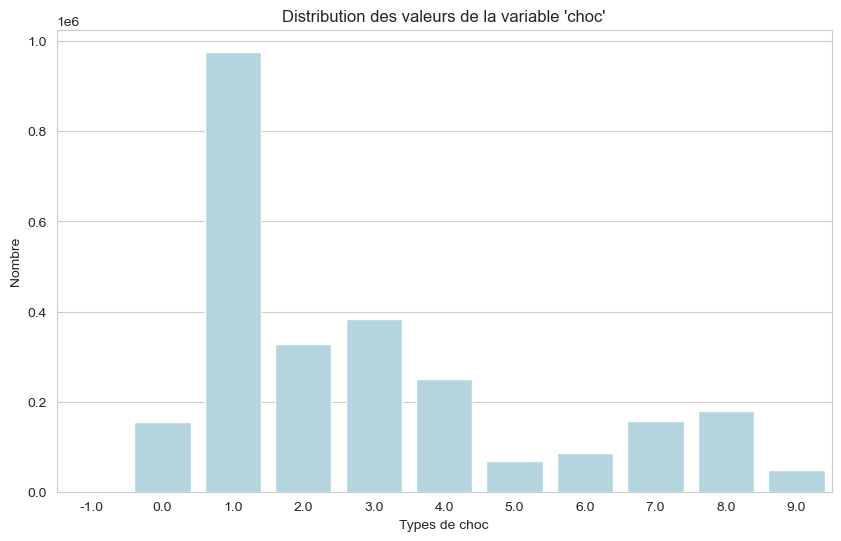

In [87]:
sns.set_style("whitegrid")

# Tracer le graphique de distribution des valeurs de 'choc'
palette = ["lightblue"]
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='choc', palette = palette)
plt.title("Distribution des valeurs de la variable 'choc'")
plt.xlabel("Types de choc")
plt.ylabel("Nombre")
plt.show()

#### Variable agg

In [88]:
locp_counts = df['agg'].value_counts()
total_count = len(df['agg'])
print("Valeurs uniques et leur décompte pour la variable 'agg':")
for value, count in locp_counts.items():
    percentage = (count / total_count) * 100
    print(f"{value}: {count} ({percentage:.2f}%)")
    
na_count = df['agg'].isna().sum()
percentage_missing = (na_count / total_count) * 100
print("Nombre de valeurs manquantes pour la variable 'agg':", na_count)
print("Pourcentage de données manquantes pour la variable 'agg': {:.2f}%".format(percentage_missing))

Valeurs uniques et leur décompte pour la variable 'agg':
2: 1715588 (65.14%)
1: 918043 (34.86%)
Nombre de valeurs manquantes pour la variable 'agg': 0
Pourcentage de données manquantes pour la variable 'agg': 0.00%


#### variable atm

In [89]:
locp_counts = df['atm'].value_counts()
total_count = len(df['atm'])
print("Valeurs uniques et leur décompte pour la variable 'atm':")
for value, count in locp_counts.items():
    percentage = (count / total_count) * 100
    print(f"{value}: {count} ({percentage:.2f}%)")
    
na_count = df['atm'].isna().sum()
percentage_missing = (na_count / total_count) * 100
print("Nombre de valeurs manquantes pour la variable 'atm':", na_count)
print("Pourcentage de données manquantes pour la variable 'atm': {:.2f}%".format(percentage_missing))

Valeurs uniques et leur décompte pour la variable 'atm':
1.0: 2124966 (80.69%)
2.0: 271612 (10.31%)
8.0: 88929 (3.38%)
3.0: 57511 (2.18%)
7.0: 31906 (1.21%)
5.0: 18718 (0.71%)
9.0: 17478 (0.66%)
4.0: 16074 (0.61%)
6.0: 6254 (0.24%)
-1.0: 34 (0.00%)
Nombre de valeurs manquantes pour la variable 'atm': 149
Pourcentage de données manquantes pour la variable 'atm': 0.01%


#### Variable col

In [92]:
locp_counts = df['col'].value_counts()
total_count = len(df['col'])
print("Valeurs uniques et leur décompte pour la variable 'col':")
for value, count in locp_counts.items():
    percentage = (count / total_count) * 100
    print(f"{value}: {count} ({percentage:.2f}%)")
    
na_count = df['col'].isna().sum()
percentage_missing = (na_count / total_count) * 100
print("Nombre de valeurs manquantes pour la variable 'col':", na_count)
print("Pourcentage de données manquantes pour la variable 'atm': {:.2f}%".format(percentage_missing))

Valeurs uniques et leur décompte pour la variable 'col':
3.0: 800804 (30.41%)
6.0: 713502 (27.09%)
2.0: 336535 (12.78%)
1.0: 295779 (11.23%)
7.0: 176023 (6.68%)
4.0: 154574 (5.87%)
5.0: 152500 (5.79%)
-1.0: 3871 (0.15%)
Nombre de valeurs manquantes pour la variable 'col': 43
Pourcentage de données manquantes pour la variable 'atm': 0.00%


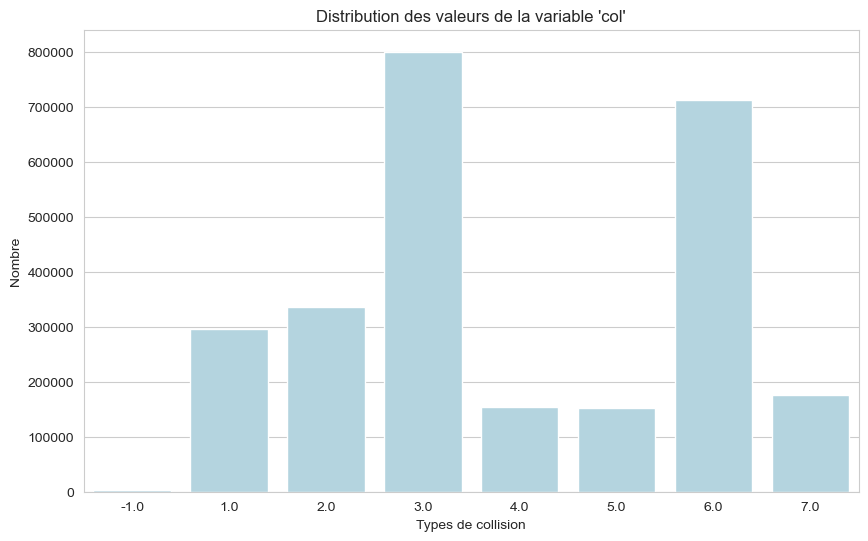

In [93]:
sns.set_style("whitegrid")

# Tracer le graphique de distribution des valeurs de 'col'
palette = ["lightblue"]
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='col', palette = palette)
plt.title("Distribution des valeurs de la variable 'col'")
plt.xlabel("Types de collision")
plt.ylabel("Nombre")
plt.show()

#### Variable circ

In [94]:
locp_counts = df['circ'].value_counts()
total_count = len(df['circ'])
print("Valeurs uniques et leur décompte pour la variable 'circ':")
for value, count in locp_counts.items():
    percentage = (count / total_count) * 100
    print(f"{value}: {count} ({percentage:.2f}%)")
    
na_count = df['circ'].isna().sum()
percentage_missing = (na_count / total_count) * 100
print("Nombre de valeurs manquantes pour la variable 'circ':", na_count)
print("Pourcentage de données manquantes pour la variable 'circ': {:.2f}%".format(percentage_missing))

Valeurs uniques et leur décompte pour la variable 'circ':
2.0: 1646894 (62.53%)
1.0: 454784 (17.27%)
3.0: 381793 (14.50%)
0.0: 104869 (3.98%)
-1.0: 26257 (1.00%)
4.0: 15471 (0.59%)
Nombre de valeurs manquantes pour la variable 'circ': 3563
Pourcentage de données manquantes pour la variable 'circ': 0.14%


#### Variable vosp

In [97]:
locp_counts = df['vosp'].value_counts()
total_count = len(df['vosp'])
print("Valeurs uniques et leur décompte pour la variable 'vosp':")
for value, count in locp_counts.items():
    percentage = (count / total_count) * 100
    print(f"{value}: {count} ({percentage:.2f}%)")
    
na_count = df['vosp'].isna().sum()
percentage_missing = (na_count / total_count) * 100
print("Nombre de valeurs manquantes pour la variable 'vosp':", na_count)
print("Pourcentage de données manquantes pour la variable 'vosp': {:.2f}%".format(percentage_missing))

Valeurs uniques et leur décompte pour la variable 'vosp':
0.0: 2443126 (92.77%)
3.0: 78408 (2.98%)
1.0: 63582 (2.41%)
2.0: 39320 (1.49%)
-1.0: 2851 (0.11%)
Nombre de valeurs manquantes pour la variable 'vosp': 6344
Pourcentage de données manquantes pour la variable 'vosp': 0.24%


#### Variable prof

In [98]:
locp_counts = df['prof'].value_counts()
total_count = len(df['prof'])
print("Valeurs uniques et leur décompte pour la variable 'prof':")
for value, count in locp_counts.items():
    percentage = (count / total_count) * 100
    print(f"{value}: {count} ({percentage:.2f}%)")
    
na_count = df['prof'].isna().sum()
percentage_missing = (na_count / total_count) * 100
print("Nombre de valeurs manquantes pour la variable 'prof':", na_count)
print("Pourcentage de données manquantes pour la variable 'prof': {:.2f}%".format(percentage_missing))

Valeurs uniques et leur décompte pour la variable 'prof':
1.0: 2029857 (77.07%)
2.0: 370715 (14.08%)
0.0: 143931 (5.47%)
3.0: 48537 (1.84%)
4.0: 36076 (1.37%)
-1.0: 79 (0.00%)
Nombre de valeurs manquantes pour la variable 'prof': 4436
Pourcentage de données manquantes pour la variable 'prof': 0.17%


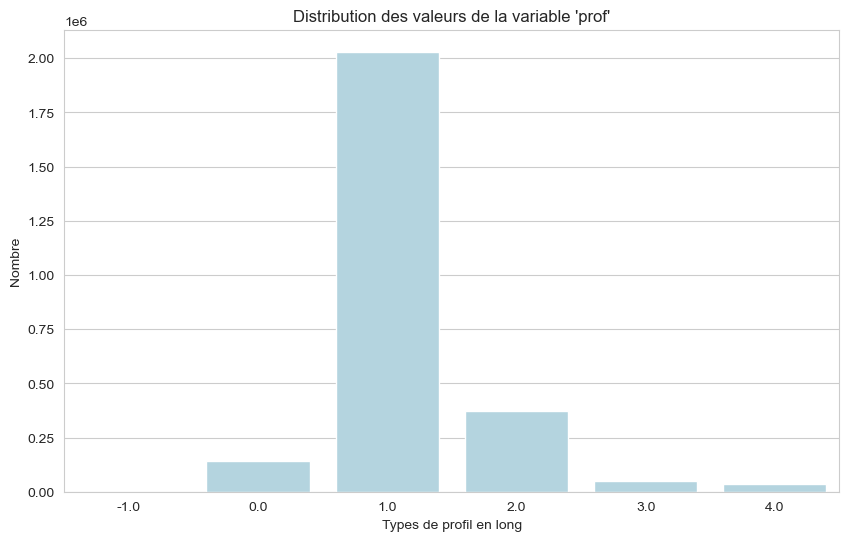

In [99]:
sns.set_style("whitegrid")

# Tracer le graphique de distribution des valeurs de 'col'
palette = ["lightblue"]
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='prof', palette = palette)
plt.title("Distribution des valeurs de la variable 'prof'")
plt.xlabel("Types de profil en long")
plt.ylabel("Nombre")
plt.show()

#### Variable plan

In [100]:
locp_counts = df['plan'].value_counts()
total_count = len(df['plan'])
print("Valeurs uniques et leur décompte pour la variable 'plan':")
for value, count in locp_counts.items():
    percentage = (count / total_count) * 100
    print(f"{value}: {count} ({percentage:.2f}%)")
    
na_count = df['plan'].isna().sum()
percentage_missing = (na_count / total_count) * 100
print("Nombre de valeurs manquantes pour la variable 'plan':", na_count)
print("Pourcentage de données manquantes pour la variable 'plan': {:.2f}%".format(percentage_missing))

Valeurs uniques et leur décompte pour la variable 'plan':
1.0: 2055937 (78.06%)
2.0: 203576 (7.73%)
3.0: 194950 (7.40%)
0.0: 141056 (5.36%)
4.0: 32652 (1.24%)
-1.0: 61 (0.00%)
Nombre de valeurs manquantes pour la variable 'plan': 5399
Pourcentage de données manquantes pour la variable 'plan': 0.21%


#### Variable surf

In [101]:
locp_counts = df['surf'].value_counts()
total_count = len(df['surf'])
print("Valeurs uniques et leur décompte pour la variable 'surf':")
for value, count in locp_counts.items():
    percentage = (count / total_count) * 100
    print(f"{value}: {count} ({percentage:.2f}%)")
    
na_count = df['surf'].isna().sum()
percentage_missing = (na_count / total_count) * 100
print("Nombre de valeurs manquantes pour la variable 'surf':", na_count)
print("Pourcentage de données manquantes pour la variable 'surf': {:.2f}%".format(percentage_missing))

Valeurs uniques et leur décompte pour la variable 'surf':
1.0: 2071739 (78.66%)
2.0: 450616 (17.11%)
0.0: 61097 (2.32%)
7.0: 14855 (0.56%)
9.0: 11820 (0.45%)
5.0: 8150 (0.31%)
8.0: 5005 (0.19%)
3.0: 3336 (0.13%)
4.0: 1301 (0.05%)
6.0: 1197 (0.05%)
-1.0: 115 (0.00%)
Nombre de valeurs manquantes pour la variable 'surf': 4400
Pourcentage de données manquantes pour la variable 'surf': 0.17%


#### Variable env1

In [102]:
locp_counts = df['env1'].value_counts()
total_count = len(df['env1'])
print("Valeurs uniques et leur décompte pour la variable 'env1':")
for value, count in locp_counts.items():
    percentage = (count / total_count) * 100
    print(f"{value}: {count} ({percentage:.2f}%)")
    
na_count = df['env1'].isna().sum()
percentage_missing = (na_count / total_count) * 100
print("Nombre de valeurs manquantes pour la variable 'env1':", na_count)
print("Pourcentage de données manquantes pour la variable 'env1': {:.2f}%".format(percentage_missing))

Valeurs uniques et leur décompte pour la variable 'env1':
0.0: 1208714 (45.90%)
99.0: 821344 (31.19%)
3.0: 96709 (3.67%)
Nombre de valeurs manquantes pour la variable 'env1': 506864
Pourcentage de données manquantes pour la variable 'env1': 19.25%


#### Variable hour_category

In [103]:
locp_counts = df['hour_category'].value_counts()
total_count = len(df['hour_category'])
print("Valeurs uniques et leur décompte pour la variable 'hour_category':")
for value, count in locp_counts.items():
    percentage = (count / total_count) * 100
    print(f"{value}: {count} ({percentage:.2f}%)")
    
na_count = df['hour_category'].isna().sum()
percentage_missing = (na_count / total_count) * 100
print("Nombre de valeurs manquantes pour la variable 'hour_category':", na_count)
print("Pourcentage de données manquantes pour la variable 'hour_category': {:.2f}%".format(percentage_missing))

Valeurs uniques et leur décompte pour la variable 'hour_category':
17: 239524 (9.09%)
18: 232225 (8.82%)
16: 196836 (7.47%)
19: 172541 (6.55%)
15: 167621 (6.36%)
14: 151386 (5.75%)
8: 147895 (5.62%)
12: 142971 (5.43%)
13: 133982 (5.09%)
11: 131672 (5.00%)
9: 124733 (4.74%)
10: 118475 (4.50%)
20: 118100 (4.48%)
7: 108878 (4.13%)
21: 82270 (3.12%)
22: 63712 (2.42%)
23: 54473 (2.07%)
6: 48549 (1.84%)
0: 45205 (1.72%)
1: 36511 (1.39%)
5: 36100 (1.37%)
2: 30139 (1.14%)
4: 26069 (0.99%)
3: 23764 (0.90%)
Nombre de valeurs manquantes pour la variable 'hour_category': 0
Pourcentage de données manquantes pour la variable 'hour_category': 0.00%


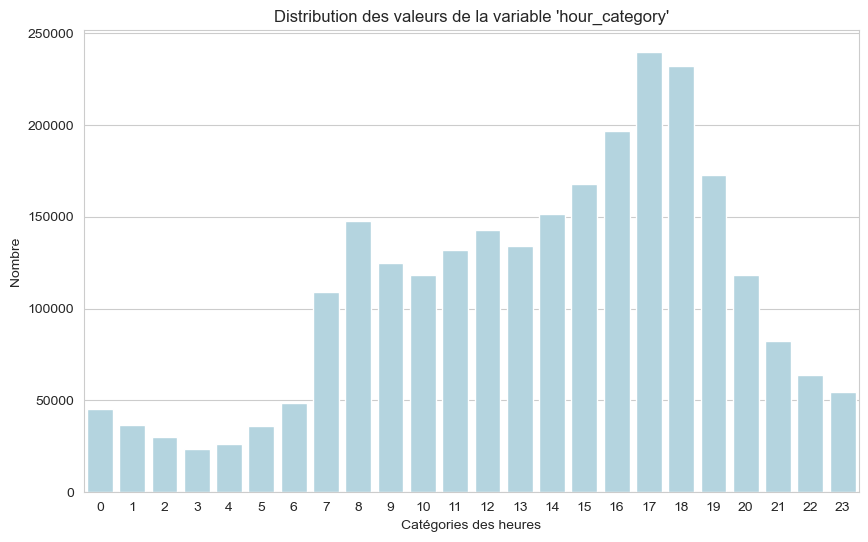

In [104]:
sns.set_style("whitegrid")

# Tracer le graphique de distribution des valeurs de 'col'
palette = ["lightblue"]
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='hour_category', palette = palette)
plt.title("Distribution des valeurs de la variable 'hour_category'")
plt.xlabel("Catégories des heures")
plt.ylabel("Nombre")
plt.show()

#### Variable motor

In [105]:
locp_counts = df['motor'].value_counts()
total_count = len(df['motor'])
print("Valeurs uniques et leur décompte pour la variable 'motor':")
for value, count in locp_counts.items():
    percentage = (count / total_count) * 100
    print(f"{value}: {count} ({percentage:.2f}%)")
    
na_count = df['motor'].isna().sum()
percentage_missing = (na_count / total_count) * 100
print("Nombre de valeurs manquantes pour la variable 'motor':", na_count)
print("Pourcentage de données manquantes pour la variable 'motor': {:.2f}%".format(percentage_missing))

Valeurs uniques et leur décompte pour la variable 'motor':
1.0: 411573 (15.63%)
0.0: 34673 (1.32%)
5.0: 20884 (0.79%)
3.0: 13307 (0.51%)
2.0: 7973 (0.30%)
6.0: 4365 (0.17%)
-1.0: 1079 (0.04%)
4.0: 298 (0.01%)
Nombre de valeurs manquantes pour la variable 'motor': 2139479
Pourcentage de données manquantes pour la variable 'motor': 81.24%


#### Variable vma

In [106]:
locp_counts = df['vma'].value_counts()
total_count = len(df['vma'])
print("Valeurs uniques et leur décompte pour la variable 'vma':")
for value, count in locp_counts.items():
    percentage = (count / total_count) * 100
    print(f"{value}: {count} ({percentage:.2f}%)")
    
na_count = df['vma'].isna().sum()
percentage_missing = (na_count / total_count) * 100
print("Nombre de valeurs manquantes pour la variable 'vma':", na_count)
print("Pourcentage de données manquantes pour la variable 'vma': {:.2f}%".format(percentage_missing))

Valeurs uniques et leur décompte pour la variable 'vma':
50.0: 253051 (9.61%)
80.0: 70012 (2.66%)
30.0: 48710 (1.85%)
90.0: 38522 (1.46%)
70.0: 37809 (1.44%)
110.0: 20456 (0.78%)
130.0: 13114 (0.50%)
-1.0: 7156 (0.27%)
60.0: 1379 (0.05%)
20.0: 1204 (0.05%)
10.0: 953 (0.04%)
40.0: 401 (0.02%)
15.0: 235 (0.01%)
5.0: 217 (0.01%)
45.0: 176 (0.01%)
25.0: 160 (0.01%)
1.0: 114 (0.00%)
2.0: 96 (0.00%)
500.0: 95 (0.00%)
100.0: 77 (0.00%)
6.0: 49 (0.00%)
35.0: 35 (0.00%)
3.0: 26 (0.00%)
300.0: 15 (0.00%)
900.0: 11 (0.00%)
4.0: 10 (0.00%)
700.0: 9 (0.00%)
7.0: 6 (0.00%)
901.0: 5 (0.00%)
65.0: 5 (0.00%)
12.0: 5 (0.00%)
42.0: 4 (0.00%)
560.0: 3 (0.00%)
502.0: 3 (0.00%)
9.0: 3 (0.00%)
75.0: 3 (0.00%)
520.0: 3 (0.00%)
8.0: 3 (0.00%)
55.0: 3 (0.00%)
120.0: 2 (0.00%)
180.0: 2 (0.00%)
0.0: 2 (0.00%)
501.0: 2 (0.00%)
770.0: 2 (0.00%)
140.0: 2 (0.00%)
800.0: 1 (0.00%)
600.0: 1 (0.00%)
Nombre de valeurs manquantes pour la variable 'vma': 2139479
Pourcentage de données manquantes pour la variable 'vma': 81.

### 2.3 Distribution / Variances des variables quantitatives continues

#### Visualisation de larrout et lartpc

In [76]:


# Convertir les valeurs en float en remplaçant les virgules par des points
df['lartpc'] = df['lartpc'].str.replace(',', '.').astype(float)
df['larrout'] = df['larrout'].str.replace(',', '.').astype(float)

# Calcul de la variance 
var_lartpc = df['lartpc'].var()
var_larrout = df['larrout'].var()

# Affichage des variances
print("Variance de larrout:", var_larrout)
print("Variance de lartpc:", var_lartpc)


Variance de larrout: 13.820195224645426
Variance de lartpc: 41.65518718873374


In [77]:
df['larrout'].dtypes

dtype('float64')

In [78]:
df['lartpc'].dtypes

dtype('float64')

In [79]:
locp_counts = df['lartpc'].value_counts()
total_count = len(df['lartpc'])
print("Valeurs uniques et leur décompte pour la variable 'lartpc':")
for value, count in locp_counts.items():
    percentage = (count / total_count) * 100
    print(f"{value}: {count} ({percentage:.2f}%)")
    
na_count = df['lartpc'].isna().sum()
percentage_missing = (na_count / total_count) * 100
print("Nombre de valeurs manquantes pour la variable 'lartpc':", na_count)
print("Pourcentage de données manquantes pour la variable 'lartpc': {:.2f}%".format(percentage_missing))


Valeurs uniques et leur décompte pour la variable 'lartpc':
0.0: 425 (0.02%)
2.5: 37 (0.00%)
3.0: 21 (0.00%)
30.0: 19 (0.00%)
2.0: 18 (0.00%)
4.0: 14 (0.00%)
3.5: 12 (0.00%)
5.0: 9 (0.00%)
6.0: 7 (0.00%)
4.5: 6 (0.00%)
6.5: 5 (0.00%)
1.5: 5 (0.00%)
5.7: 5 (0.00%)
10.0: 4 (0.00%)
3.1: 4 (0.00%)
2.8: 4 (0.00%)
8.0: 4 (0.00%)
5.5: 4 (0.00%)
10.2: 4 (0.00%)
42.0: 3 (0.00%)
7.0: 3 (0.00%)
3.2: 3 (0.00%)
2.7: 3 (0.00%)
8.2: 3 (0.00%)
6.1: 2 (0.00%)
7.5: 2 (0.00%)
6.3: 2 (0.00%)
0.4: 2 (0.00%)
8.8: 2 (0.00%)
40.0: 2 (0.00%)
15.0: 2 (0.00%)
5.25: 2 (0.00%)
13.0: 2 (0.00%)
10.5: 2 (0.00%)
20.0: 1 (0.00%)
6.8: 1 (0.00%)
0.8: 1 (0.00%)
12.5: 1 (0.00%)
1.6: 1 (0.00%)
3.7: 1 (0.00%)
Nombre de valeurs manquantes pour la variable 'lartpc': 2632983
Pourcentage de données manquantes pour la variable 'lartpc': 99.98%


#### Variable larrout

Largeur de la chaussée affectée à la circulation des véhicules ne sont pas compris les bandes d'arrêt
d'urgence, les TPC et les places de stationnement (en m).

In [80]:
locp_counts = df['larrout'].value_counts()
total_count = len(df['larrout'])
print("Valeurs uniques et leur décompte pour la variable 'larrout':")
for value, count in locp_counts.items():
    percentage = (count / total_count) * 100
    print(f"{value}: {count} ({percentage:.2f}%)")
    
na_count = df['larrout'].isna().sum()
percentage_missing = (na_count / total_count) * 100
print("Nombre de valeurs manquantes pour la variable 'larrout':", na_count)
print("Pourcentage de données manquantes pour la variable 'int': {:.2f}%".format(percentage_missing))


Valeurs uniques et leur décompte pour la variable 'larrout':
-1.0: 339152 (12.88%)
4.0: 6537 (0.25%)
5.0: 2962 (0.11%)
7.0: 2525 (0.10%)
3.0: 2128 (0.08%)
5.5: 1523 (0.06%)
14.0: 698 (0.03%)
10.5: 671 (0.03%)
10.0: 619 (0.02%)
6.0: 593 (0.02%)
0.0: 562 (0.02%)
13.5: 523 (0.02%)
3.5: 459 (0.02%)
12.0: 361 (0.01%)
9.0: 293 (0.01%)
17.5: 187 (0.01%)
8.0: 75 (0.00%)
6.5: 69 (0.00%)
15.0: 57 (0.00%)
18.0: 56 (0.00%)
4.5: 50 (0.00%)
5.6: 46 (0.00%)
7.3: 45 (0.00%)
5.8: 44 (0.00%)
5.4: 43 (0.00%)
7.5: 40 (0.00%)
5.7: 36 (0.00%)
7.6: 35 (0.00%)
6.2: 35 (0.00%)
6.3: 34 (0.00%)
5.2: 29 (0.00%)
6.4: 27 (0.00%)
24.0: 25 (0.00%)
6.8: 24 (0.00%)
5.3: 24 (0.00%)
13.0: 24 (0.00%)
17.0: 23 (0.00%)
21.0: 22 (0.00%)
6.6: 21 (0.00%)
11.0: 21 (0.00%)
10.3: 20 (0.00%)
6.7: 19 (0.00%)
170.0: 18 (0.00%)
11.5: 16 (0.00%)
8.5: 16 (0.00%)
4.8: 16 (0.00%)
3.8: 15 (0.00%)
4.7: 15 (0.00%)
3.6: 14 (0.00%)
7.2: 14 (0.00%)
4.2: 14 (0.00%)
4.3: 13 (0.00%)
7.8: 13 (0.00%)
2.5: 12 (0.00%)
3.2: 12 (0.00%)
4.4: 12 (0.00%)


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2633631 entries, 0 to 2633630
Data columns (total 60 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Num_Acc        int64  
 1   place          float64
 2   catu           int64  
 3   grav           int64  
 4   sexe           int64  
 5   trajet         float64
 6   secu           float64
 7   locp           float64
 8   actp           object 
 9   etatp          float64
 10  an_nais        float64
 11  num_veh        object 
 12  id_vehicule_x  object 
 13  secu1          float64
 14  secu2          float64
 15  secu3          float64
 16  id_usager      object 
 17  senc           float64
 18  catv           int64  
 19  occutc         float64
 20  obs            float64
 21  obsm           float64
 22  choc           float64
 23  manv           float64
 24  id_vehicule_y  object 
 25  motor          float64
 26  an             int64  
 27  mois           int64  
 28  jour           int64  
 29  hrmn          

Imputation des Nan et des -1 par mode ou KNN.

### 2.4 Visualisation des valeurs manquantes

## 3. Visualisation des données (Analyse de fond)

- Visualisation de la variable cible
- Visualisation des relations variables avec la cible

### 3.1 Visualisation de la variable cible

La variable est préservée de 2005 à 2022.
Gravité de l'accident : Les usagers accidentés sont classés en trois catégories de victimes plus les indemnes  
1 - Indemne  
2 - Tué  
3 - Blessé hospitalisé  
4 - Blessé léger 

#### 3.1.1 Décompte des valeurs grav et pourcentage

In [ ]:
import pandas as pd
# Comptage des valeurs de la colonne 'grav'
count_values = df['grav'].value_counts(dropna=False)

# Nombre de valeurs manquantes
na_count = df['grav'].isna().sum()

# Calcul du pourcentage de chaque valeur de 'grav'
percentage_values = (count_values / len(df)) * 100

# Affichage des résultats
print("Décompte des valeurs de 'grav':")
print(count_values)
print("\nPourcentage de chaque valeur de 'grav':")
print(percentage_values)
print("\nNombre de valeurs manquantes (NA):", na_count)


Décompte des valeurs de 'grav':
grav
 1    1081303
 4     960980
 3     520447
 2      70600
-1        301
Name: count, dtype: int64

Pourcentage de chaque valeur de 'grav':
grav
 1    41.057498
 4    36.488787
 3    19.761576
 2     2.680710
-1     0.011429
Name: count, dtype: float64

Nombre de valeurs manquantes (NA): 0


#### 3.1.2 Représentation de grav

grav
 1    1082803
 4     961920
 3     520836
 2      70629
-1        301
Name: count, dtype: int64


C:\Users\campa\AppData\Local\Temp\ipykernel_18128\912927207.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percentage_by_grav.index, y=percentage_by_grav, palette='viridis')


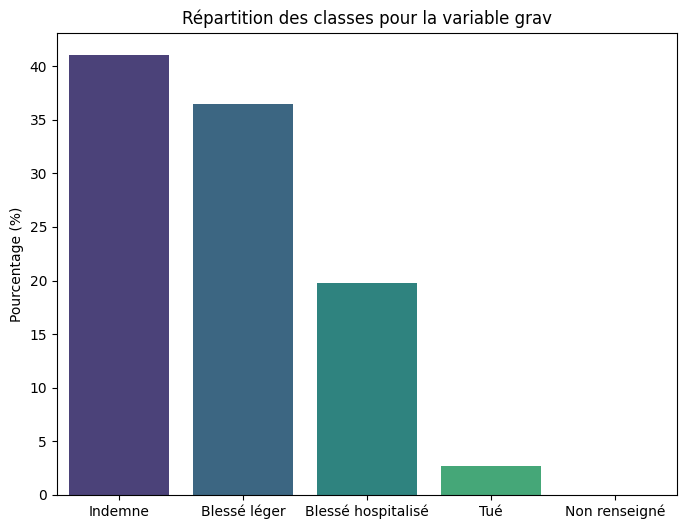

In [ ]:
# Effectuer un décompte pour chaque valeur de la variable 'grav'
count_by_grav = df['grav'].value_counts()

# Afficher le décompte pour chaque valeur
print(count_by_grav)

import seaborn as sns
import matplotlib.pyplot as plt

# Effectuer un décompte pour chaque valeur de la variable 'grav'
count_by_grav = df['grav'].value_counts()

# Calculer le pourcentage de chaque classe
percentage_by_grav = (count_by_grav / len(df)) * 100

# Mapper les valeurs de grav aux traductions correspondantes
grav_labels = {
    -1: 'Non renseigné',
    1: 'Indemne',
    2: 'Tué',
    3: 'Blessé hospitalisé',
    4: 'Blessé léger'
}

# Renommer les index avec les traductions correspondantes
percentage_by_grav.index = [grav_labels.get(x, x) for x in percentage_by_grav.index]

# Tracer un barplot avec la palette de couleurs Viridis
plt.figure(figsize=(8, 6))
sns.barplot(x=percentage_by_grav.index, y=percentage_by_grav, palette='viridis')
plt.title('Répartition des classes pour la variable grav')
plt.xlabel('')
plt.ylabel('Pourcentage (%)')
plt.show()



### 3.2 Visualisation des relations variables avec la cible

#### 3.2.1 Gravité en fonction des catégories d'usagers

- Nombre d'accident par gravité et selon la catégorie d'usager
- Proportion de la gravité de l'accident en fonction du type d'usager et test statistiques.
- Tableau de contingence

##### a- Nombre d'accidents par gravité et selon la catégorie d'usager

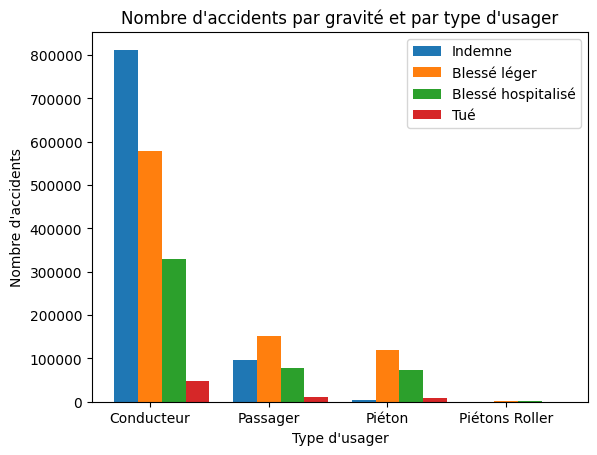

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Supposons que votre dataframe s'appelle df

# Compter le nombre d'accidents par gravité et par type d'usager
accidents_par_grav_catu = df.groupby(['grav', 'catu']).agg({'Num_Acc': 'nunique'}).reset_index()

# Filtrer les données pour chaque gravité
accidents_grav_1 = accidents_par_grav_catu[accidents_par_grav_catu['grav'] == 1]
accidents_grav_2 = accidents_par_grav_catu[accidents_par_grav_catu['grav'] == 2]
accidents_grav_3 = accidents_par_grav_catu[accidents_par_grav_catu['grav'] == 3]
accidents_grav_4 = accidents_par_grav_catu[accidents_par_grav_catu['grav'] == 4]

# Plot
fig, ax = plt.subplots()

# Largeur des barres
bar_width = 0.2

# Positions des barres
index = accidents_grav_1['catu']

# Plot des barres pour chaque gravité dans l'ordre demandé
ax.bar(index - bar_width, accidents_grav_1['Num_Acc'], bar_width, label='Indemne')
ax.bar(index, accidents_grav_4['Num_Acc'], bar_width, label='Blessé léger')
ax.bar(index + bar_width, accidents_grav_3['Num_Acc'], bar_width, label='Blessé hospitalisé')
ax.bar(index + 2*bar_width, accidents_grav_2['Num_Acc'], bar_width, label='Tué')

ax.set_xlabel('Type d\'usager')
ax.set_ylabel('Nombre d\'accidents')
ax.set_title('Nombre d\'accidents par gravité et par type d\'usager')
ax.set_xticks(index)
ax.set_xticklabels(['Conducteur', 'Passager', 'Piéton', 'Piétons Roller'])
ax.legend()

plt.show()


##### b- Proportion de la gravité de l'accident en fonction du type d'usager et test statistiques.

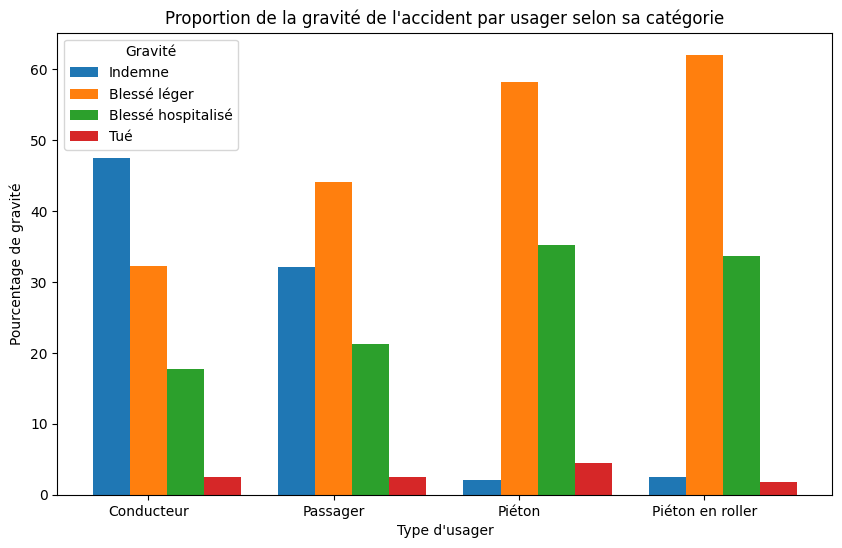

In [ ]:
# Representation graphique de chaque catégorie de gravité en fonction de la catégorie d'usagers.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Calculer le total de 'grav' par 'catu'
total_grav_par_catu = df.groupby('catu')['grav'].count()

# Calculer le nombre de 'grav' par 'catu'
grav_par_catu = df.groupby(['catu', 'grav']).size().unstack(fill_value=0)

# Calculer les pourcentages de 'grav' par 'catu'
pourcentage_grav_par_catu = grav_par_catu.div(total_grav_par_catu, axis=0) * 100

# Renommer les labels des usagers
pourcentage_grav_par_catu.index = ['Conducteur', 'Passager', 'Piéton', 'Piéton en roller']

# Changer l'ordre d'affichage de la gravité
pourcentage_grav_par_catu = pourcentage_grav_par_catu[[1, 4, 3, 2]]

# Plot
bar_width = 0.2
index = np.arange(len(pourcentage_grav_par_catu.index))

fig, ax = plt.subplots(figsize=(10, 6))
for i, grav_type in enumerate(pourcentage_grav_par_catu.columns):
    ax.bar(index + i * bar_width, pourcentage_grav_par_catu[grav_type], bar_width, label=grav_type)

ax.set_xlabel('Type d\'usager')
ax.set_ylabel('Pourcentage de gravité')
ax.set_title("Proportion de la gravité de l'accident par usager selon sa catégorie")
ax.set_xticks(index + bar_width)
ax.set_xticklabels(pourcentage_grav_par_catu.index)
ax.legend(title='Gravité', labels=['Indemne', 'Blessé léger', 'Blessé hospitalisé', 'Tué'])
plt.show()

In [ ]:
import numpy as np
from scipy.stats import norm

# Calculer les proportions de chaque catégorie de gravité pour chaque catégorie de catu
proportions = df.groupby('catu')['grav'].value_counts(normalize=True).unstack()

# Afficher les proportions
print("Proportions de chaque catégorie de gravité pour chaque catégorie de catu :")
print(proportions)

# Comparer les proportions avec un test de z
catu_reference = 1  # Catégorie de référence (conducteurs)
catu_labels = {1: 'Conducteur', 2: 'Passager', 3: 'Piéton', 4: 'Piéton en roller'}
grav_labels = {1: 'Indemne', 2: 'Tué', 3: 'Blessé hospitalisé', 4: 'Blessé léger'}


# Conducteur vs Passager pour toutes les catégories de gravité
for grav in proportions.columns:
    if grav != -1:  # Exclure la catégorie "inconnue" si elle existe
        p_conducteur = proportions.loc[1, grav]
        p_passager = proportions.loc[2, grav] if 2 in proportions.index else 0
        n_conducteur = df[(df['catu'] == 1) & (df['grav'] == grav)].shape[0]
        n_passager = df[(df['catu'] == 2) & (df['grav'] == grav)].shape[0]
        p_diff = p_conducteur - p_passager
        se_diff = np.sqrt(p_conducteur*(1-p_conducteur)/n_conducteur + p_passager*(1-p_passager)/n_passager)
        z_score = p_diff / se_diff
        p_value = 2 * norm.cdf(-np.abs(z_score))  # Test bilatéral
        print(f"Conducteur vs Passager pour grav {grav_labels[grav]} : z-score = {z_score}, p-value = {p_value}")

# Conducteur vs Piéton pour toutes les catégories de gravité
for grav in proportions.columns:
    if grav != -1:  # Exclure la catégorie "inconnue" si elle existe
        p_conducteur = proportions.loc[1, grav]
        p_pieton = proportions.loc[3, grav] if 3 in proportions.index else 0
        n_conducteur = df[(df['catu'] == 1) & (df['grav'] == grav)].shape[0]
        n_pieton = df[(df['catu'] == 3) & (df['grav'] == grav)].shape[0]
        p_diff = p_conducteur - p_pieton
        se_diff = np.sqrt(p_conducteur*(1-p_conducteur)/n_conducteur + p_pieton*(1-p_pieton)/n_pieton)
        z_score = p_diff / se_diff
        p_value = 2 * norm.cdf(-np.abs(z_score))  # Test bilatéral
        print(f"Conducteur vs Piéton pour grav {grav_labels[grav]} : z-score = {z_score}, p-value = {p_value}")

# Passager vs Piéton pour toutes les catégories de gravité
for grav in proportions.columns:
    if grav != -1:  # Exclure la catégorie "inconnue" si elle existe
        p_passager = proportions.loc[2, grav] if 2 in proportions.index else 0
        p_pieton = proportions.loc[3, grav] if 3 in proportions.index else 0
        n_passager = df[(df['catu'] == 2) & (df['grav'] == grav)].shape[0]
        n_pieton = df[(df['catu'] == 3) & (df['grav'] == grav)].shape[0]
        p_diff = p_passager - p_pieton
        se_diff = np.sqrt(p_passager*(1-p_passager)/n_passager + p_pieton*(1-p_pieton)/n_pieton)
        z_score = p_diff / se_diff
        p_value = 2 * norm.cdf(-np.abs(z_score))  # Test bilatéral
        print(f"Passager vs Piéton pour grav {grav_labels[grav]} : z-score = {z_score}, p-value = {p_value}")


Proportions de chaque catégorie de gravité pour chaque catégorie de catu :
grav        -1         1         2         3         4
catu                                                  
1     0.000153  0.475127  0.025117  0.176759  0.322844
2     0.000002  0.321506  0.025649  0.212164  0.440678
3          NaN  0.020972  0.044450  0.352801  0.581776
4          NaN  0.025000  0.018539  0.335955  0.620506
Conducteur vs Passager pour grav Indemne : z-score = 115.79670438541325, p-value = 0.0
Conducteur vs Passager pour grav Tué : z-score = -0.3277608512356976, p-value = 0.7430924897841314
Conducteur vs Passager pour grav Blessé hospitalisé : z-score = -24.13189236764317, p-value = 1.1568973841078837e-128
Conducteur vs Passager pour grav Blessé léger : z-score = -93.87746825137182, p-value = 0.0
Conducteur vs Piéton pour grav Indemne : z-score = 207.61321036668278, p-value = 0.0
Conducteur vs Piéton pour grav Tué : z-score = -8.728357907888237, p-value = 2.5839682301526952e-18
Conducteur vs 

##### c- Table de contingence - catu/grav

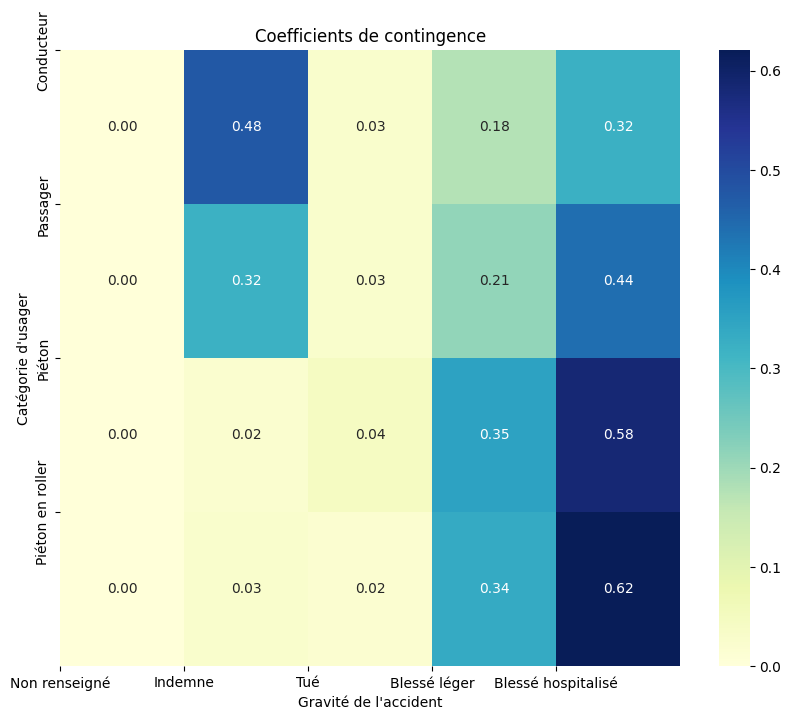

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supposons que catu et grav sont déjà dans votre DataFrame df

# Créer un tableau de contingence
conti = pd.crosstab(df["catu"], df["grav"])

# Ordre d'affichage pour grav
grav_labels = ['Non renseigné','Indemne','Tué', 'Blessé léger', 'Blessé hospitalisé']

# Calcul du coefficient de contingence normalisé
conti_form = conti.apply(lambda x: x / x.sum(), axis=1)

# Tracer le heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conti_form, annot=True, cmap="YlGnBu", fmt=".2f")

# Ajouter des labels pour les axes x et y
plt.xticks(ticks=range(len(conti.columns)), labels=grav_labels)
plt.yticks(ticks=range(len(conti.index)), labels=['Conducteur', 'Passager', 'Piéton', 'Piéton en roller'])

plt.title("Coefficients de contingence")
plt.xlabel("Gravité de l'accident")
plt.ylabel("Catégorie d'usager")
plt.show()


#### 3.2.2 Gravité en fonction du type de route (variable 'catr')

- Nombre d'accidents par gravité et selon le type de route
- Proportion de la gravité de l'accident en fonction du type de route

##### a- Nombre d'accidents par gravité et selon le type de route

In [ ]:
# Nombre de valeurs uniques de catr
nb_valeurs_uniques_catr = df['catr'].nunique()

# Nombre d'occurrences par valeur unique de catr
occurrences_catr = df['catr'].value_counts()

print("Nombre de valeurs uniques de catr :", nb_valeurs_uniques_catr)
print("Nombre d'occurrences par valeur unique de catr :\n", occurrences_catr)


Nombre de valeurs uniques de catr : 8
Nombre d'occurrences par valeur unique de catr :
 catr
4.0    1219254
3.0     874037
1.0     243531
2.0     222505
9.0      39272
7.0      16980
6.0      16875
5.0       4033
Name: count, dtype: int64


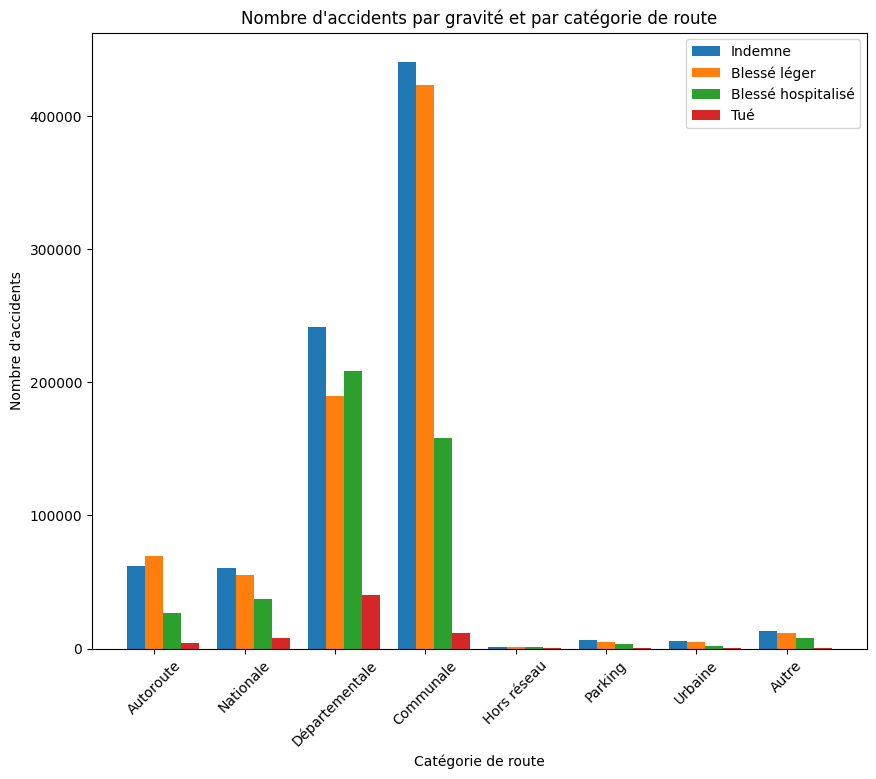

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Supposons que votre dataframe s'appelle df

# Compter le nombre d'accidents par gravité et par type de route
accidents_par_grav_catr = df.groupby(['grav', 'catr']).agg({'Num_Acc': 'nunique'}).reset_index()

# Filtrer les données pour chaque gravité
accidents_grav_1 = accidents_par_grav_catr[accidents_par_grav_catr['grav'] == 1]
accidents_grav_2 = accidents_par_grav_catr[accidents_par_grav_catr['grav'] == 2]
accidents_grav_3 = accidents_par_grav_catr[accidents_par_grav_catr['grav'] == 3]
accidents_grav_4 = accidents_par_grav_catr[accidents_par_grav_catr['grav'] == 4]

# Positions des barres
index = list(range(len(accidents_grav_1)))

# Plot
fig, ax = plt.subplots(figsize=(10, 8))

# Largeur des barres
bar_width = 0.2

# Plot des barres pour chaque gravité dans l'ordre demandé
ax.bar([i - bar_width for i in index], accidents_grav_1['Num_Acc'], bar_width, label='Indemne')
ax.bar(index, accidents_grav_4['Num_Acc'], bar_width, label='Blessé léger')
ax.bar([i + bar_width for i in index], accidents_grav_3['Num_Acc'], bar_width, label='Blessé hospitalisé')
ax.bar([i + 2*bar_width for i in index], accidents_grav_2['Num_Acc'], bar_width, label='Tué')

ax.set_xlabel('Catégorie de route')
ax.set_ylabel("Nombre d'accidents")
ax.set_title("Nombre d'accidents par gravité et par catégorie de route")
ax.set_xticks(index)
ax.set_xticklabels(['Autoroute', 'Nationale', 'Départementale', 'Communale', 'Hors réseau', 
                    'Parking', 'Urbaine', 'Autre'],
                   rotation=45)  # Rotation des étiquettes à 45 degrés
ax.legend()

plt.show()


##### b- Proportion de la gravité de l'accident en fonction du type de route

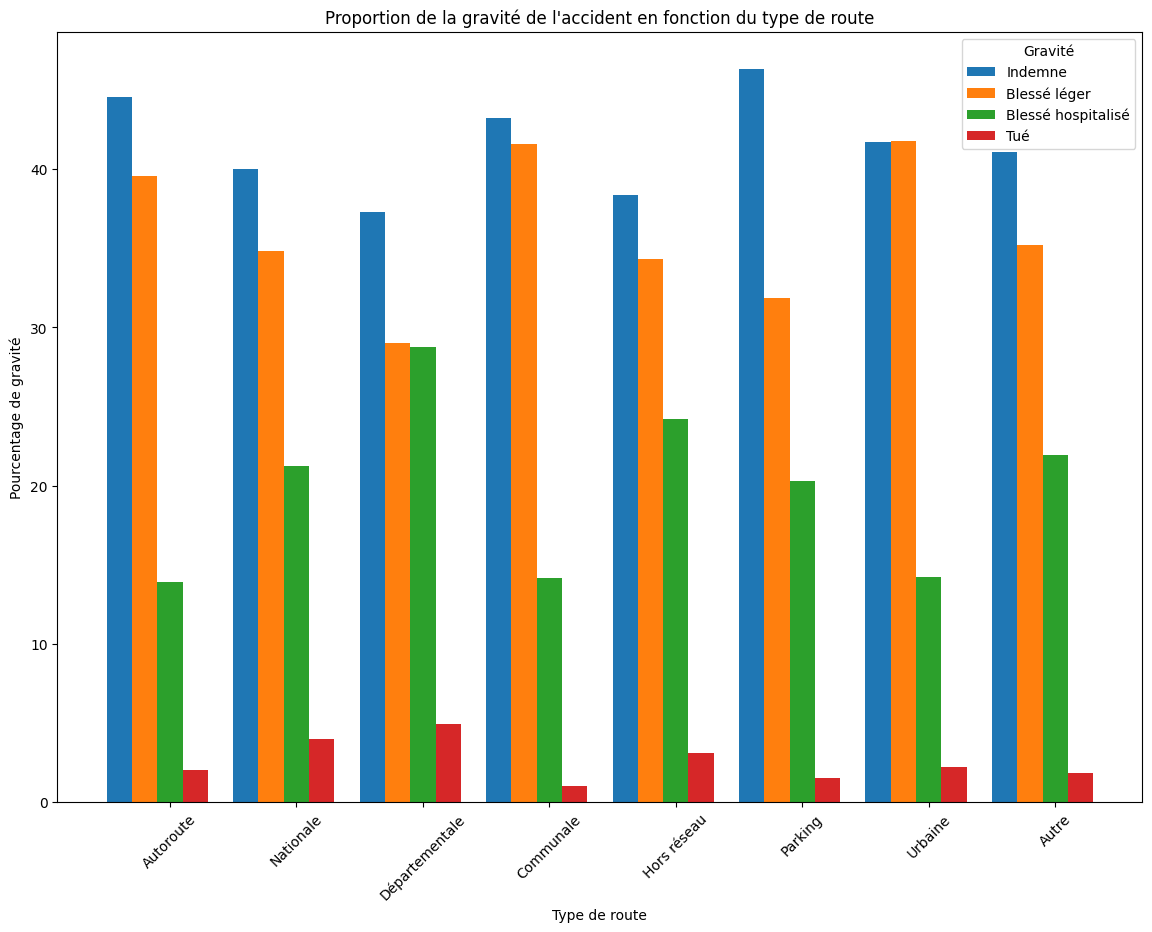

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Calculer le total de 'grav' par 'catr'
total_grav_par_catr = df.groupby('catr')['grav'].count()

# Calculer le nombre de 'grav' par 'catr'
grav_par_catr = df.groupby(['catr', 'grav']).size().unstack(fill_value=0)

# Calculer les pourcentages de 'grav' par 'catr'
pourcentage_grav_par_catr = grav_par_catr.div(total_grav_par_catr, axis=0) * 100

# Renommer les labels des routes
pourcentage_grav_par_catr.index = ['Autoroute', 'Nationale', 'Départementale', 'Communale', 'Hors réseau', 'Parking', 'Urbaine', 'Autre']

# Changer l'ordre d'affichage de la gravité
pourcentage_grav_par_catr = pourcentage_grav_par_catr[[1, 4, 3, 2]]

# Plot
bar_width = 0.2
index = np.arange(len(pourcentage_grav_par_catr.index))

fig, ax = plt.subplots(figsize=(14, 10))
for i, grav_type in enumerate(pourcentage_grav_par_catr.columns):
    ax.bar(index + i * bar_width, pourcentage_grav_par_catr[grav_type], bar_width, label=grav_type)

ax.set_xlabel('Type de route')
ax.set_ylabel('Pourcentage de gravité')
ax.set_title("Proportion de la gravité de l'accident en fonction du type de route")
ax.set_xticks(index + (len(pourcentage_grav_par_catr.columns) / 2) * bar_width)
ax.set_xticklabels(pourcentage_grav_par_catr.index, rotation=45)
ax.legend(title='Gravité', labels=['Indemne', 'Blessé léger', 'Blessé hospitalisé', 'Tué'])
plt.show()


In [ ]:
import numpy as np
from scipy.stats import norm

# Calculer les proportions de chaque catégorie de gravité pour chaque catégorie de catu
proportions = df.groupby('catr')['grav'].value_counts(normalize=True).unstack()

# Afficher les proportions
print("Proportions de chaque catégorie de gravité pour chaque catégorie de catu :")
print(proportions)

# Comparer les proportions avec un test de z
catur_reference = 1  # Catégorie de référence (conducteurs)
catr_labels = {1: 'Autoroute', 2: 'Nationale', 3: 'Départementale', 4: 'Communale', 5: 'Hors réseau public', 6: 'Parking', 7: 'Urbaine', 9: 'Autre'}
grav_labels = {1: 'Indemne', 2: 'Tué', 3: 'Blessé hospitalisé', 4: 'Blessé léger'}


# Comparer les proportions de gravité "Tué" entre chaque type de route avec un test de z
for catr1 in proportions.index:
    for catr2 in proportions.index:
        if catr1 != catr2 and 2 in proportions.columns:  # Comparer chaque paire de catégories de route sauf elles-mêmes et si la catégorie "Tué" est présente
            p_tue_catr1 = proportions.loc[catr1, 2]
            n_tue_catr1 = df[(df['catr'] == catr1) & (df['grav'] == 2)].shape[0]
            p_tue_catr2 = proportions.loc[catr2, 2]
            n_tue_catr2 = df[(df['catr'] == catr2) & (df['grav'] == 2)].shape[0]
            p_diff = p_tue_catr1 - p_tue_catr2
            p_pool = (p_tue_catr1 * n_tue_catr1 + p_tue_catr2 * n_tue_catr2) / (n_tue_catr1 + n_tue_catr2)
            se_diff = np.sqrt(p_pool * (1 - p_pool) * (1 / n_tue_catr1 + 1 / n_tue_catr2))
            z_score = p_diff / se_diff
            p_value = 2 * norm.cdf(-np.abs(z_score))  # Test bilatéral
            print(f"Comparaison des proportions de 'Tué' entre le type de route '{catr_labels[catr1]}' et '{catr_labels[catr2]}' : z-score = {z_score}, p-value = {p_value}")


Proportions de chaque catégorie de gravité pour chaque catégorie de catu :
grav        -1         1         2         3         4
catr                                                  
1.0   0.000066  0.445336  0.020375  0.138849  0.395375
2.0   0.000063  0.399735  0.039734  0.212323  0.348145
3.0   0.000116  0.372798  0.049170  0.287754  0.290163
4.0   0.000118  0.432231  0.010154  0.141763  0.415735
5.0        NaN  0.383337  0.030994  0.242251  0.343417
6.0   0.000237  0.463407  0.014874  0.202726  0.318756
7.0   0.001119  0.417079  0.022203  0.142167  0.417432
9.0   0.000076  0.410471  0.018257  0.219317  0.351879
Comparaison des proportions de 'Tué' entre le type de route 'Autoroute' et 'Nationale' : z-score = -6.129645071355262, p-value = 8.807533370473619e-10
Comparaison des proportions de 'Tué' entre le type de route 'Autoroute' et 'Départementale' : z-score = -9.1497103414459, p-value = 5.708640758033644e-20
Comparaison des proportions de 'Tué' entre le type de route 'Autoroute

In [ ]:
# Comparer les proportions de chaque catégorie de gravité entre chaque paire de catégories de route avec un test de z
for catr1 in proportions.index:
    for catr2 in proportions.index:
        if catr1 != catr2:  # Comparer chaque paire de catégories de route sauf elles-mêmes
            for grav in proportions.columns:
                if grav != -1:  # Exclure la catégorie "inconnue" si elle existe
                    p_grav_catr1 = proportions.loc[catr1, grav]
                    n_grav_catr1 = df[(df['catr'] == catr1) & (df['grav'] == grav)].shape[0]
                    p_grav_catr2 = proportions.loc[catr2, grav]
                    n_grav_catr2 = df[(df['catr'] == catr2) & (df['grav'] == grav)].shape[0]
                    p_diff = p_grav_catr1 - p_grav_catr2
                    p_pool = (p_grav_catr1 * n_grav_catr1 + p_grav_catr2 * n_grav_catr2) / (n_grav_catr1 + n_grav_catr2)
                    se_diff = np.sqrt(p_pool * (1 - p_pool) * (1 / n_grav_catr1 + 1 / n_grav_catr2))
                    z_score = p_diff / se_diff
                    p_value = 2 * norm.cdf(-np.abs(z_score))  # Test bilatéral
                    if p_value < 0.05:
                        print(f"Comparaison des proportions de '{grav_labels[grav]}' entre le type de route '{catr_labels[catr1]}' et '{catr_labels[catr2]}' : z-score = {z_score}, p-value = {p_value}")


Comparaison des proportions de 'Indemne' entre le type de route 'Autoroute' et 'Nationale' : z-score = 20.392876290408484, p-value = 1.93432717352346e-92
Comparaison des proportions de 'Tué' entre le type de route 'Autoroute' et 'Nationale' : z-score = -6.129645071355262, p-value = 8.807533370473619e-10
Comparaison des proportions de 'Blessé hospitalisé' entre le type de route 'Autoroute' et 'Nationale' : z-score = -26.751616956000433, p-value = 1.182435108880758e-157
Comparaison des proportions de 'Blessé léger' entre le type de route 'Autoroute' et 'Nationale' : z-score = 20.220291259518458, p-value = 6.489887107889416e-91
Comparaison des proportions de 'Indemne' entre le type de route 'Autoroute' et 'Départementale' : z-score = 42.404908392458886, p-value = 0.0
Comparaison des proportions de 'Tué' entre le type de route 'Autoroute' et 'Départementale' : z-score = -9.1497103414459, p-value = 5.708640758033644e-20
Comparaison des proportions de 'Blessé hospitalisé' entre le type de ro

##### c- Moyenne annuelle des proportions de gravité d'accidents par type de route

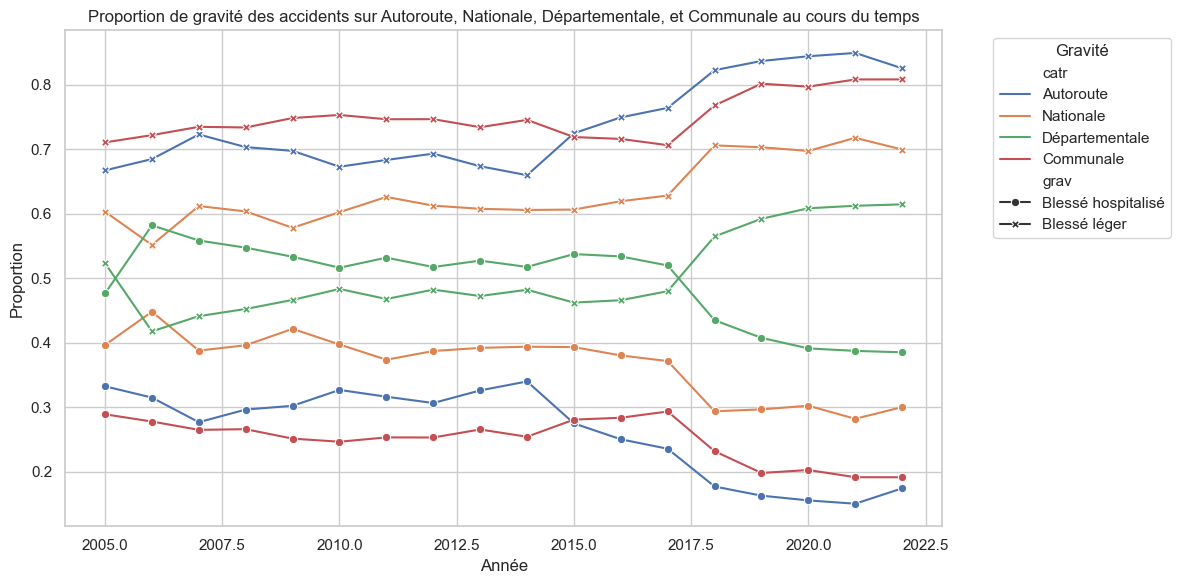

In [ ]:
# Filtrer les accidents de classe 2, 3 et 4 de 'catr' et uniquement les valeurs 3 et 4 de gravité
accidents_classe_1_2_3_4_ = df[(df['catr'].isin([1, 2, 3, 4])) & (df['grav'].isin([3, 4]))]

# Calculer la proportion de chaque catégorie de gravité pour chaque année et chaque catégorie de 'catr'
proportion_gravite_par_an_catrr = accidents_classe_1_2_3_4_.groupby(['an', 'catr', 'grav']).size().reset_index(name='nombre_accidents')

# Calculer le nombre total d'accidents par an pour chaque catégorie de 'catr' (2, 3 et 4)
nombre_total_accidents_par_an_catrr = accidents_classe_1_2_3_4_.groupby(['an', 'catr']).size().reset_index(name='nombre_total_accidents')

# Fusionner les deux DataFrames sur les colonnes 'an' et 'catr'
proportion_gravite_par_an_catrr = proportion_gravite_par_an_catrr.merge(nombre_total_accidents_par_an_catrr, on=['an', 'catr'])

# Calculer la proportion de chaque catégorie de gravité pour chaque année et chaque catégorie de 'catr'
proportion_gravite_par_an_catrr['proportion'] = proportion_gravite_par_an_catrr['nombre_accidents'] / proportion_gravite_par_an_catrr['nombre_total_accidents']

# Remplacement des labels pour la variable 'grav'
proportion_gravite_par_an_catrr['grav'] = proportion_gravite_par_an_catrr['grav'].replace({
    3: 'Blessé hospitalisé',
    4: 'Blessé léger'
})

# Remplacement des valeurs de 'catr'
proportion_gravite_par_an_catrr['catr'] = proportion_gravite_par_an_catrr['catr'].replace({
    1: 'Autoroute',
    2: 'Nationale',
    3: 'Départementale',
    4: 'Communale'
})

# Représentation graphique des proportions de gravité au fil du temps pour chaque catégorie de 'catr'
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(data=proportion_gravite_par_an_catrr, x='an', y='proportion', hue='catr', style='grav', markers=True, dashes=False)
plt.title("Proportion de gravité des accidents sur Autoroute, Nationale, Départementale, et Communale au cours du temps")
plt.xlabel("Année")
plt.ylabel("Proportion")
plt.legend(title='Gravité', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
import plotly.express as px

# Utiliser le DataFrame proportion_gravite_par_an_catr
# Convertir 'grav' en une variable catégorielle pour conserver l'ordre des catégories
proportion_gravite_par_an_catr['grav'] = proportion_gravite_par_an_catr['grav'].astype('category')

# Mapper les étiquettes de gravité aux valeurs numériques
label_gravite = {1: 'Indemne', 2: 'Tué', 3: 'Blessé hospitalisé', 4: 'Blessé léger'}
proportion_gravite_par_an_catr['grav_label'] = proportion_gravite_par_an_catr['grav'].map(label_gravite)

# Créer un graphique interactif avec Plotly Express
fig = px.line(proportion_gravite_par_an_catr, x='an', y='proportion', color='grav_label', line_group='catr',
              markers=True, title="Proportion de gravité des accidents pour les classes 2, 3 et 4 de 'catr' au fil du temps",
              labels={'an': 'Année', 'proportion': 'Proportion', 'catr': 'Catégorie de catr', 'grav_label': 'Gravité'},
              category_orders={'grav_label': ['Indemne', 'Tué', 'Blessé hospitalisé', 'Blessé léger']},
              line_dash_sequence=['solid', 'dot', 'dash'],
              )
fig.update_layout(title_x=0.5)
fig.show()


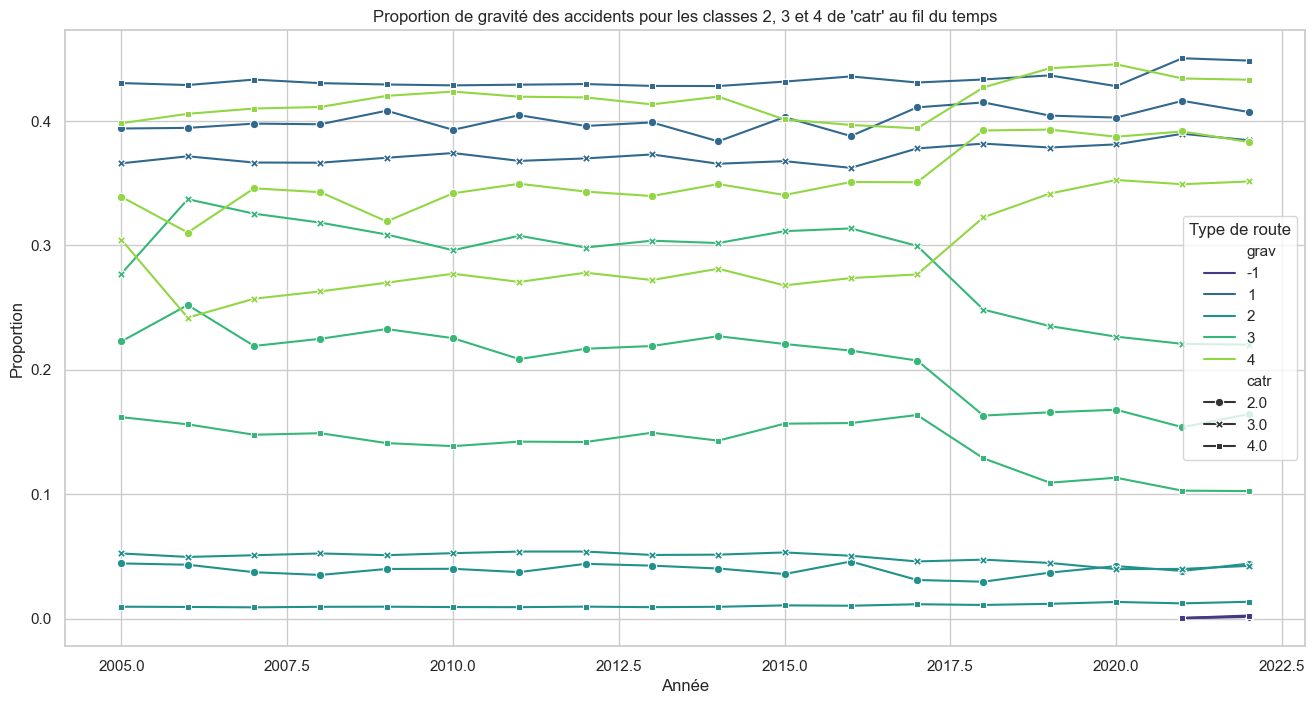

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mapper les couleurs aux catégories de gravité
couleurs_gravite = {1: 'green', 2: 'red', 3: 'orange', 4: 'gold'}

# Mapper les étiquettes de type de route aux valeurs numériques
label_catr = {2: 'Nationale', 3: 'Départementale', 4: 'Communale'}
proportion_gravite_par_an_catr['catr_label'] = proportion_gravite_par_an_catr['catr'].map(label_catr)

# Créer un graphique avec Seaborn
plt.figure(figsize=(16, 8))
sns.lineplot(data=proportion_gravite_par_an_catr, x='an', y='proportion', hue='grav', style='catr', markers=True, dashes=False, palette='viridis')
plt.title("Proportion de gravité des accidents pour les classes 2, 3 et 4 de 'catr' au fil du temps")
plt.xlabel("Année")
plt.ylabel("Proportion")
plt.legend(title='Gravité', labels=['Indemne', 'Tué', 'Blessé hospitalisé', 'Blessé léger'])
plt.gca().set_prop_cycle(None)  # Réinitialiser le cycle des couleurs pour afficher les catr avec différentes couleurs

plt.legend(title='Type de route')
plt.show()


##### d- Table de contingence catr/grav

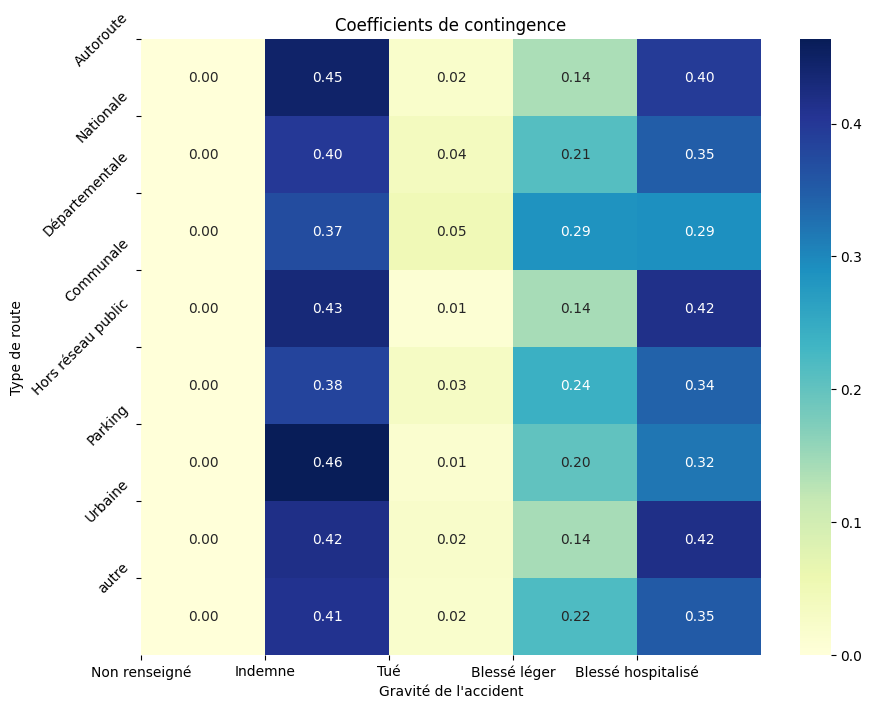

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Créer un tableau de contingence
conti = pd.crosstab(df["catr"], df["grav"])

# Ordre d'affichage pour grav
grav_labels = ['Non renseigné', 'Indemne', 'Tué', 'Blessé léger', 'Blessé hospitalisé']

# Calcul du coefficient de contingence normalisé
conti_form = conti.apply(lambda x: x / x.sum(), axis=1)

# Tracer le heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conti_form, annot=True, cmap="YlGnBu", fmt=".2f")

# Ajouter des labels pour les axes x et y
plt.xticks(ticks=range(len(conti.columns)), labels=grav_labels)
plt.yticks(ticks=range(len(conti.index)), labels=['Autoroute', 'Nationale', 'Départementale', 'Communale', 'Hors réseau public', 'Parking', 'Urbaine', 'autre'])

# Rotation des étiquettes de l'axe y à 45 degrés
plt.yticks(rotation=45)

plt.title("Coefficients de contingence")
plt.xlabel("Gravité de l'accident")
plt.ylabel("Type de route")
plt.show()


#### 3.2.3 Gravité selon agg (Agglomération ou Hors Agglo)

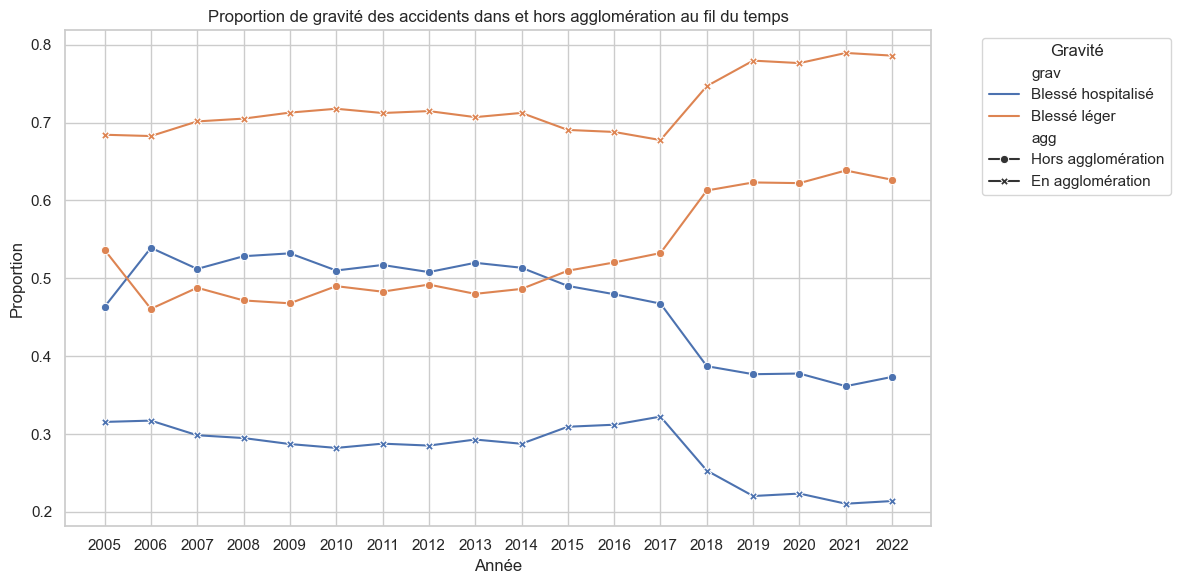

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrer les accidents de classe 1 et 2 et uniquement les valeurs 3 et 4 de gravité
accidents_classe_1_2_3_4_ = df[(df['agg'].isin([1, 2])) & (df['grav'].isin([3, 4]))]

# Calculer la proportion de chaque catégorie de gravité pour chaque année et chaque catégorie de 'agg'
proportion_gravite_par_an_agg = accidents_classe_1_2_3_4_.groupby(['an', 'agg', 'grav']).size().reset_index(name='nombre_accidents')

# Calculer le nombre total d'accidents par an pour chaque catégorie de 'agg' (1 et 2)
nombre_total_accidents_par_an_agg = accidents_classe_1_2_3_4_.groupby(['an', 'agg']).size().reset_index(name='nombre_total_accidents')

# Fusionner les deux DataFrames sur les colonnes 'an' et 'agg'
proportion_gravite_par_an_agg = proportion_gravite_par_an_agg.merge(nombre_total_accidents_par_an_agg, on=['an', 'agg'])

# Calculer la proportion de chaque catégorie de gravité pour chaque année et chaque catégorie de 'agg'
proportion_gravite_par_an_agg['proportion'] = proportion_gravite_par_an_agg['nombre_accidents'] / proportion_gravite_par_an_agg['nombre_total_accidents']

# Remplacement des labels pour la variable 'grav'
proportion_gravite_par_an_agg['grav'] = proportion_gravite_par_an_agg['grav'].replace({
    3: 'Blessé hospitalisé',
    4: 'Blessé léger'
})

# Remplacement des valeurs de 'agg'
proportion_gravite_par_an_agg['agg'] = proportion_gravite_par_an_agg['agg'].replace({
    1: 'Hors agglomération',
    2: 'En agglomération'
})

# Représentation graphique des proportions de gravité au fil du temps pour chaque catégorie de 'agg'
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(data=proportion_gravite_par_an_agg, x='an', y='proportion', hue='grav', style='agg', markers=True, dashes=False)
plt.title("Proportion de gravité des accidents dans et hors agglomération au fil du temps")
plt.xlabel("Année")
plt.ylabel("Proportion")
plt.legend(title='Gravité', bbox_to_anchor=(1.05, 1), loc='upper left')

# Spécifier le format des valeurs sur l'axe x pour qu'elles soient entières
plt.xticks(proportion_gravite_par_an_agg['an'].unique(), [str(an) for an in proportion_gravite_par_an_agg['an'].unique()])

plt.tight_layout()
plt.show()

In [ ]:
print(df['an'].unique())

[2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018
 2019 2020 2021 2022]


## Outlier


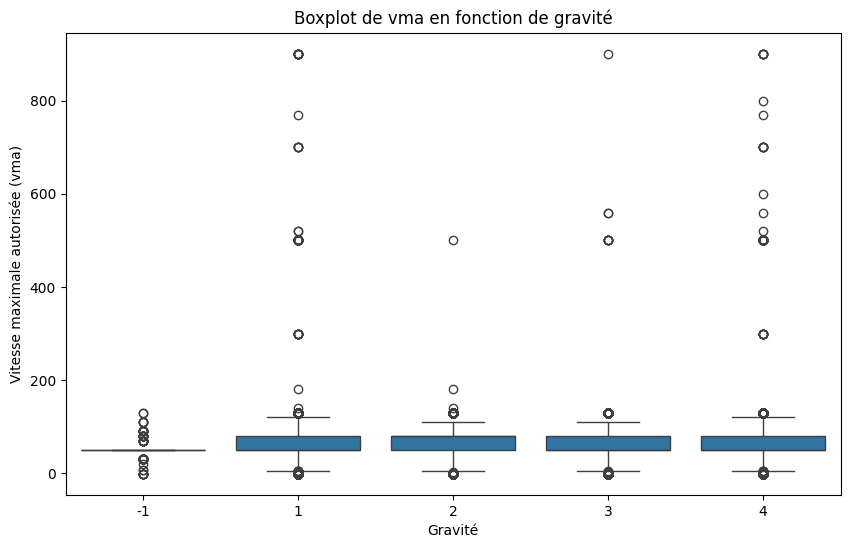

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Créer le boxplot avec Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='grav', y='vma', data=df)
plt.title('Boxplot de vma en fonction de gravité')
plt.xlabel('Gravité')
plt.ylabel('Vitesse maximale autorisée (vma)')
plt.show()


## 4. Preprocessing

### 4.1 Homogénéisation et Création de variables

- Homogénéisation de la variable 'an'
- Homogénéisation de la variable 'dep'
- hour_cat : catégorise chaque heure en tranches de 1 heure dans la colonne hrmn,

#### 4.1.1 Homogénéisation de la variable 'an'

In [ ]:
# Définir un dictionnaire de mapping pour convertir les valeurs de 'an'
mapping = {5: 2005, 6: 2006, 7: 2007, 8: 2008, 9: 2009, 10: 2010, 
           11: 2011, 12: 2012, 13: 2013, 14: 2014, 15: 2015, 
           16: 2016, 17: 2017, 18: 2018, 2019: 2019, 2020: 2020,
           2021: 2021, 2022: 2022}

# Appliquer la transformation en utilisant le mapping
df['an'] = df['an'].map(mapping)

# Vérifier les valeurs uniques après transformation
print("Valeurs uniques pour la colonne 'an' après transformation :")
print(df['an'].unique())
print(df['an'])

Valeurs uniques pour la colonne 'an' après transformation :
[2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018
 2019 2020 2021 2022]
0          2005
1          2005
2          2005
3          2005
4          2005
           ... 
2636484    2022
2636485    2022
2636486    2022
2636487    2022
2636488    2022
Name: an, Length: 2636489, dtype: int64


#### 4.1.2 Homogénéisation de la variable dep

#### 4.1.3 Création de la variable hour_cat

In [ ]:
import pandas as pd

# Convertir la colonne 'hrmn' en format datetime
df['hrmn'] = pd.to_datetime(df['hrmn'], format='%H:%M')

# Extraire l'heure de la colonne 'hrmn'
df['hour_cat'] = df['hrmn'].dt.hour

# Catégoriser par tranche de 1 heure et arrondir à l'entier inférieur
df['hour_cat'] = (df['hour_cat'] // 1) + 1

# Afficher le DataFrame avec la nouvelle colonne 'hour_cat'
print(df[['hrmn', 'hour_cat']])


                       hrmn  hour_cat
0       1900-01-01 19:00:00        20
1       1900-01-01 19:00:00        20
2       1900-01-01 19:00:00        20
3       1900-01-01 19:00:00        20
4       1900-01-01 19:00:00        20
...                     ...       ...
2636484 1900-01-01 08:40:00         9
2636485 1900-01-01 08:40:00         9
2636486 1900-01-01 08:40:00         9
2636487 1900-01-01 16:55:00        17
2636488 1900-01-01 16:55:00        17

[2636489 rows x 2 columns]


### 4.2 Suppression des lignes non renseignées pour la target : -301 lignes

In [ ]:
import pandas as pd
# Comptage des valeurs de la colonne 'grav'
count_values = df['grav'].value_counts(dropna=False)

# Nombre de valeurs manquantes
na_count = df['grav'].isna().sum()

# Calcul du pourcentage de chaque valeur de 'grav'
percentage_values = (count_values / len(df)) * 100

# Affichage des résultats
print("Décompte des valeurs de 'grav':")
print(count_values)
print("\nPourcentage de chaque valeur de 'grav':")
print(percentage_values)
print("\nNombre de valeurs manquantes (NA):", na_count)

Décompte des valeurs de 'grav':
grav
 1    1081303
 4     960980
 3     520447
 2      70600
-1        301
Name: count, dtype: int64

Pourcentage de chaque valeur de 'grav':
grav
 1    41.057498
 4    36.488787
 3    19.761576
 2     2.680710
-1     0.011429
Name: count, dtype: float64

Nombre de valeurs manquantes (NA): 0


In [ ]:
# Recherche des indices des lignes où 'grav' est égal à -1
indices_to_drop = df.index[df['grav'] == -1]

# Suppression des lignes correspondantes
df.drop(indices_to_drop, inplace=True)

### 4.3 Suppression des lignes dupliquées, des variables selon NaN et valeurs non renseignées

#### 4.3.1 Suppression des lignes doublons

In [ ]:
# Recherche de doublons
duplicates = df[df.duplicated()]

# Compte le nombre de lignes identiques
num_duplicates = len(duplicates)
print("Nombre de doublons trouvés :", num_duplicates)

Nombre de doublons trouvés : 2858


In [ ]:
df = df.drop_duplicates()
df = df.reset_index(drop=True)

#### 4.3.2 Heatmap des valeurs manquantes

Ces variables se visualisent très bien sur une heatmap de valeurs manquantes.  
La Heatmap représente notre df avec les colonnes numérotés en ordonnées et les variables/colonnes indiquées en abscisses. Le df a été construit d'une telle manière qu'on retrouve les lignes dans l'ordre chronologique avec l'année 2005 au sommet et 2022 tout en bas. Le blanc vaut 1 pour 100 % de valeurs manquantes et le noir vaut 0 pour 0 % de valeurs manquantes. On peut constater qu'un certain nombre de variables apparaissent ou disparaissent dans la partie basse du tableau correspondant souvent à l'année 2019.  

On retrouve la liste des variables et leur signification dans les différentes documentations sur le site gouvernemental.

<Axes: >

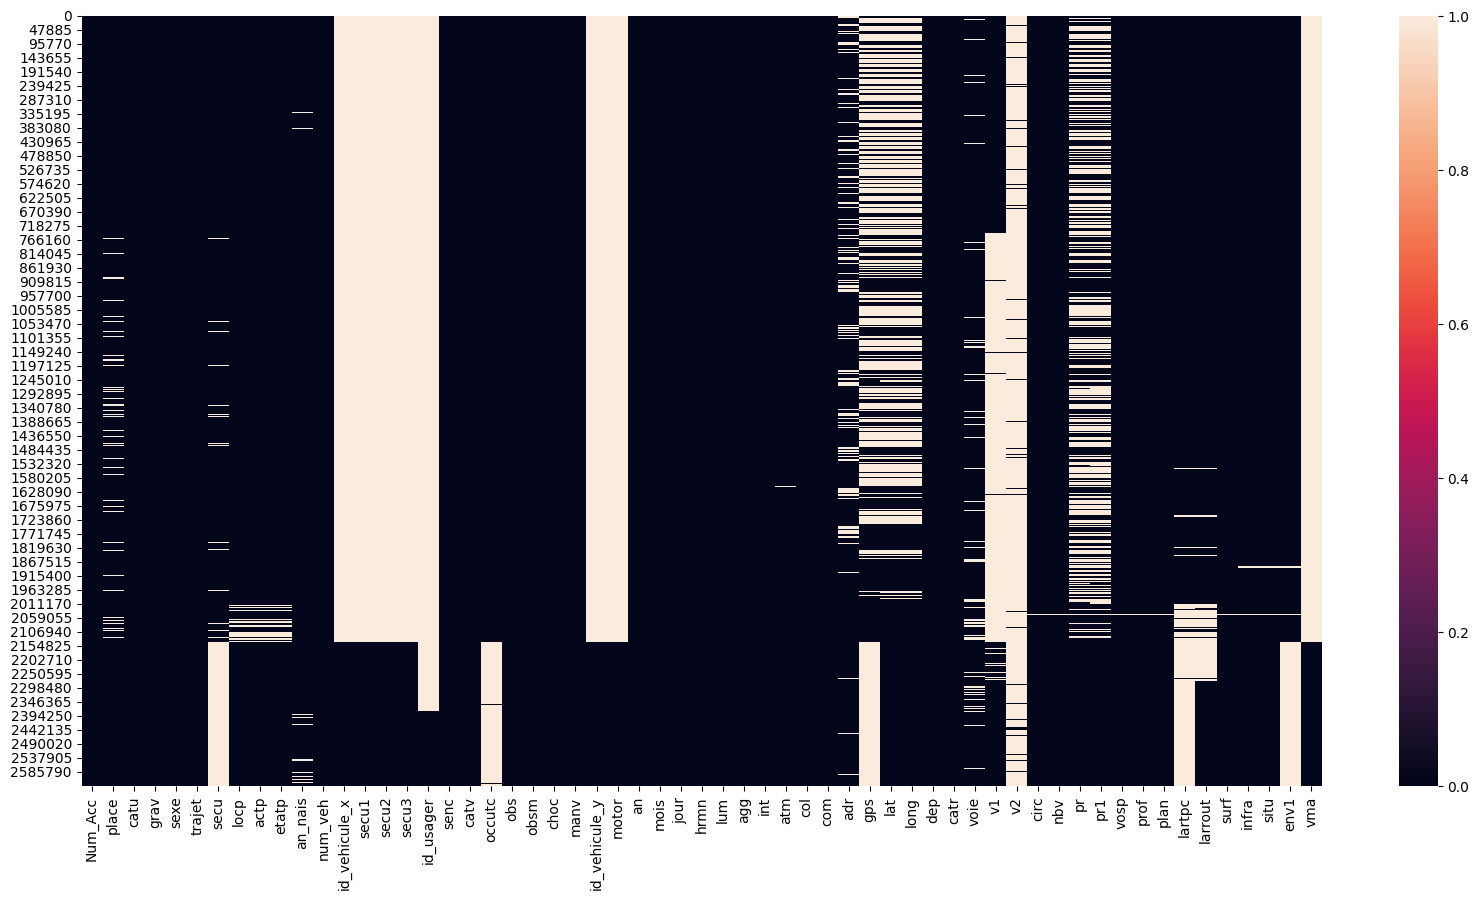

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize= (20, 10))
sns.heatmap(df.isna())

Voici un tableau récapitulatif avec le pourcentage de valeurs manquantes des variables selon différentes périodes : avant 2019, 2019 à 2021 et l'année 2022.

In [ ]:
import pandas as pd

# Nombre total d'observations pour chaque période
total_before_2019 = len(df[df['an'] < 2019])
total_between_2019_and_2021 = len(df[(df['an'] >= 2019) & (df['an'] <= 2021)])
total_in_2022 = len(df[df['an'] == 2022])

# Calculer le pourcentage de valeurs manquantes pour chaque variable dans chaque période
missing_percentage_before_2019 = (df[df['an'] < 2019].isnull().sum() / total_before_2019) * 100
missing_percentage_between_2019_and_2021 = (df[(df['an'] >= 2019) & (df['an'] <= 2021)].isnull().sum() / total_between_2019_and_2021) * 100
missing_percentage_in_2022 = (df[df['an'] == 2022].isnull().sum() / total_in_2022) * 100

# Calculer le nombre total de valeurs manquantes pour chaque variable
total_missing = df.isnull().sum()

# Calculer le pourcentage total de valeurs manquantes pour chaque variable
total_missing_percentage = (total_missing / len(df)) * 100

# Créer un DataFrame pour stocker les résultats
missing_info_df = pd.DataFrame({
    'Variable': total_missing.index,
    'Avant 2019 (%)': missing_percentage_before_2019.values,
    'Entre 2019 et 2021 (%)': missing_percentage_between_2019_and_2021.values,
    'En 2022 (%)': missing_percentage_in_2022.values,
    'Total Missing': total_missing.values,
    'Total (%)': total_missing_percentage.values
})

# Trier le DataFrame par ordre décroissant du nombre total de valeurs manquantes
missing_info_df_sorted = missing_info_df.sort_values(by='Total Missing', ascending=False)




In [ ]:
# Afficher le DataFrame résultant
missing_info_df_sorted.head(22)

,Variable,Avant 2019 (%),Entre 2019 et 2021 (%),En 2022 (%),Total Missing,Total (%)
44,v2,95.725361,92.479673,90.610888,2502647,95.026486
16,id_usager,100.000000,64.828945,0.000000,2377715,90.282769
12,id_vehicule_x,100.000000,0.000000,0.000000,2139479,81.236855
25,motor,100.000000,0.000000,0.000000,2139479,81.236855
24,id_vehicule_y,100.000000,0.000000,0.000000,2139479,81.236855
15,secu3,100.000000,0.000000,0.000000,2139479,81.236855
14,secu2,100.000000,0.000000,0.000000,2139479,81.236855
13,secu1,100.000000,0.000000,0.000000,2139479,81.236855
58,vma,100.000000,0.000000,0.000000,2139479,81.236855
37,gps,48.846845,100.000000,100.000000,1539220,58.444786


#### 4.3.3 Choix des drop de variables

Apparition des variables id_vehicule_x et id_vehicule_y, secu1, secu2, secu3, id_usager, motor et vma.  
Disparition des variables secu, gps, et env1.  

Mention pour lartpc, la variable présente 99 % de données manquantes à partir de 2019, elle n'a pas disparu mais semble moins renseigné. Elle est présente de la même façon dans les documentations de 2005 à 2022.  

D'autres variables qui ne correspondent pas à une apparition ou disparition en 2019 méritent d'être étudiées avec attention. Par exemple 'lat' et long' renseignent à elles deux les coordonnées géographiques précises d'un accident. Elles sont fournies sur l'ensemble de la période et accumulent 40 % de valeurs manquantes réparties presque aléatoirement avant 2019. Indépendamment de ces valeurs manquantes, est-ce qu'un modèle est capable de lire les coordonnées : informations séparées dans deux variables. Je pense qu'on peut retirer ces deux-là.  
Le reste des variables seront étudier en preprocessing, yes ?



nbv = nombre de voie de circulation, nombreuses données aberrantes. Utile?
pr = numéro de PR de rattachement (borne?)  
pr1 = distance de la borne PR en mètre  
pr et pr1 n'ont aucune chance d'être correlé à la gravité d'un accident, on peut toujours checker.  

larrout : argeur de la chaussée affectée à la circulation des véhicules ne sont pas compris les bandes d'arrêt
d'urgence, les TPC et les places de stationnement (en m). Imputation sur les NaN et sur valeur -1 par mode ou plus proche voisin.

lat et long, deux variables pour une unique information : des coordonnées. Ne sera pas compris par un modèle.  

actp: valeurs non renseignées très majoritaire.

hrmn : l'heure est remplacé par hour_cat.  

locp : position du piéton, dominante de valeur non renseignées. 

occutc : nombre d'occupant dans le transport en commun, très grand nombre de NaN après 2019.  

etatp: piéton accidenté, seul, accompagné ou en groupe. La variable prend 'Non renseigné' et une valeur non documentée en large dominante.  

senc: Des NaN et très largement non renseignée.

trajet : 27% de données non renseignées.  

manv : environ 50% de données 'inconnues' ou non renseignées.

#### 4.3.4 Suppression de Variables


In [ ]:
colonnes_a_supprimer = ['manv', 'trajet','senc','occutc', 'etatp', 'lartpc', 'hrmn','com', 'adr', 'gps', 'v2', 'v1', 'voie', 'num_veh', 'dep', 'env1', 'vma', 'secu', 'secu1', 'secu2', 'secu3', 'id_usager', 'motor', 'id_vehicule_y', 'id_vehicule_x', 'pr', 'pr1', 'nbv', 'lat', 'long', 'actp']
df_sans_colonnes = df.drop(columns=colonnes_a_supprimer)
df_sans_colonnes.dropna(subset=['grav'], inplace=True)

In [ ]:
df_sans_colonnes.head()

,Num_Acc,place,catu,grav,sexe,locp,an_nais,catv,obs,obsm,choc,an,mois,jour,lum,agg,int,atm,col,catr,circ,vosp,prof,plan,larrout,surf,infra,situ,hour_cat
0,200500000001,1.0,1,4,1,0.0,1976.0,7,0.0,2.0,1.0,2005,1,12,3,2,1,1.0,3.0,3.0,2.0,0.0,1.0,1.0,63.0,1.0,0.0,1.0,20
1,200500000001,1.0,1,3,2,0.0,1968.0,7,0.0,2.0,8.0,2005,1,12,3,2,1,1.0,3.0,3.0,2.0,0.0,1.0,1.0,63.0,1.0,0.0,1.0,20
2,200500000001,2.0,2,1,1,0.0,1964.0,7,0.0,2.0,8.0,2005,1,12,3,2,1,1.0,3.0,3.0,2.0,0.0,1.0,1.0,63.0,1.0,0.0,1.0,20
3,200500000001,4.0,2,1,1,0.0,2004.0,7,0.0,2.0,8.0,2005,1,12,3,2,1,1.0,3.0,3.0,2.0,0.0,1.0,1.0,63.0,1.0,0.0,1.0,20
4,200500000001,5.0,2,1,1,0.0,1998.0,7,0.0,2.0,8.0,2005,1,12,3,2,1,1.0,3.0,3.0,2.0,0.0,1.0,1.0,63.0,1.0,0.0,1.0,20


In [ ]:
df_sans_colonnes.shape

(2633330, 29)

### 4.4 SimpleImputer - Imputation

#### 4.4.1 SimpleImputer - Traitement des NaN

In [ ]:
missing_values_count = df_sans_colonnes.isna().sum()
missing_values_count_sorted = missing_values_count.sort_values(ascending=False)
print(missing_values_count_sorted)


larrout     255380
place       122736
locp         56348
infra        12594
situ         11602
an_nais       8350
vosp          6344
plan          5399
prof          4436
surf          4400
circ          3563
obs           1061
obsm           854
choc           304
atm            149
col             43
catr             2
Num_Acc          0
lum              0
int              0
agg              0
jour             0
mois             0
an               0
catv             0
sexe             0
grav             0
catu             0
hour_cat         0
dtype: int64


place = Les valeurs NaN et -1 peuvent être remplacer par le mode ou le plus proche voisin (KNN).    
infra = Les valeurs NaN et -1 peuvent être remplacer par le mode ou le plus proche voisin (KNN).  
situ = Les valeurs NaN et -1 peuvent être remplacer par le mode ou le plus proche voisin (KNN).  
larrout = Les valeurs NaN et -1 peuvent être remplacer par le mode ou le plus proche voisin (KNN).  

In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

# Ajouter '-1' à la liste des valeurs manquantes
df_sans_colonnes.replace(-1, np.nan, inplace=True)

# Imputer les valeurs manquantes avec le mode pour chaque colonne
columns_to_impute = ['place', 'larrout', 'locp', 'infra', 'situ','vosp', 'plan', 'prof', 'surf', 'circ', 'obs', 'obsm', 'choc', 'atm', 'col', 'catr']
df_sans_colonnes[columns_to_impute] = imputer.fit_transform(df_sans_colonnes[columns_to_impute])


In [ ]:
missing_values_count = df_sans_colonnes.isna().sum()
missing_values_count_sorted = missing_values_count.sort_values(ascending=False)
print(missing_values_count_sorted)

an_nais     8350
sexe        5806
grav         301
int           21
catv          13
lum           10
infra          0
situ           0
atm            0
larrout        0
plan           0
prof           0
vosp           0
circ           0
catr           0
col            0
surf           0
Num_Acc        0
agg            0
place          0
jour           0
mois           0
an             0
choc           0
obsm           0
obs            0
locp           0
catu           0
hour_cat       0
dtype: int64


#### 4.4.2 SimpleImputer sur les -1 transformés en NaN

In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer

# Imputer les valeurs manquantes avec le mode pour chaque colonne
columns_to_impute_2 = ['int', 'catv', 'lum']
df_sans_colonnes[columns_to_impute_2] = imputer.fit_transform(df_sans_colonnes[columns_to_impute_2])


In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer

# Création de l'objet SimpleImputer pour la colonne 'sexe'
imputer_sexe = SimpleImputer(missing_values=np.nan, strategy='most_frequent') ### A remplacer par une stategy du plus proche voisin KNN ?

# Remplacement des valeurs manquantes dans la colonne 'sexe'
df_sans_colonnes['sexe'] = imputer_sexe.fit_transform(df_sans_colonnes[['sexe']])

In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer

imputer_an_nais = SimpleImputer(missing_values=np.nan, strategy='mean') ### A remplacer par une stategy du plus proche voisin KNN ?
df_sans_colonnes['an_nais'] = imputer.fit_transform(df_sans_colonnes[['an_nais']])

In [ ]:
missing_values_count = df_sans_colonnes.isna().sum()
missing_values_count_sorted = missing_values_count.sort_values(ascending=False)
print(missing_values_count_sorted)

Num_Acc     0
agg         0
situ        0
infra       0
surf        0
larrout     0
plan        0
prof        0
vosp        0
circ        0
catr        0
col         0
atm         0
int         0
lum         0
place       0
jour        0
mois        0
an          0
choc        0
obsm        0
obs         0
catv        0
an_nais     0
locp        0
sexe        0
grav        0
catu        0
hour_cat    0
dtype: int64


### 4.5 X_train et X_test

In [ ]:
df_sans_colonnes.drop(columns=['larrout'], inplace=True) ##### Relancer X et y  après le drop de larrout

## Le drop de larrout permet de faire lancer le chi², autre string could not convert to float ou l'inverse.
## On pouvoir retravailler larrout pour garder la variable

In [ ]:
from sklearn.model_selection import train_test_split

# Diviser les données en fonction des caractéristiques (X) et de la cible (y)
X = df_sans_colonnes.drop(columns=['grav'])  # Caractéristiques
y = df_sans_colonnes['grav']  # Cible

In [ ]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Afficher les tailles des ensembles d'entraînement et de test
print("Taille de l'ensemble d'entraînement:", X_train.shape[0])
print("Taille de l'ensemble de test:", X_test.shape[0])

Taille de l'ensemble d'entraînement: 2106664
Taille de l'ensemble de test: 526666


### 4.6 SelectKBest - Test de chi²

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


k_best = SelectKBest(chi2, k=29)
k_best.fit_transform(X, y)



C:\Users\campa\AppData\Roaming\Python\Python312\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=29 is greater than n_features=27. All the features will be returned.
  warnings.warn(


array([[200500000001, 1.0, 1, ..., 0.0, 1.0, 20],
       [200500000001, 1.0, 1, ..., 0.0, 1.0, 20],
       [200500000001, 2.0, 2, ..., 0.0, 1.0, 20],
       ...,
       [202200055301, 1.0, 1, ..., 0.0, 1.0, 9],
       [202200055302, 1.0, 1, ..., 0.0, 1.0, 17],
       [202200055302, 1.0, 1, ..., 0.0, 1.0, 17]], dtype=object)

In [ ]:
selected_columns = X.columns[k_best.get_support()]
print(selected_columns)
scores = k_best.scores_
p_values = k_best.pvalues_
print(scores)
print(p_values)

Index(['Num_Acc', 'place', 'catu', 'sexe', 'locp', 'an_nais', 'catv', 'obs',
       'obsm', 'choc', 'an', 'mois', 'jour', 'lum', 'agg', 'int', 'atm', 'col',
       'catr', 'circ', 'vosp', 'prof', 'plan', 'surf', 'infra', 'situ',
       'hour_cat'],
      dtype='object')
[7.99092197e+09 3.44456261e+04 5.35377786e+04 4.95175234e+03
 3.74952855e+05 6.76395818e+03 7.74569880e+05 8.81951320e+05
 5.81649486e+04 1.53538902e+04 7.98974464e+01 1.24164026e+02
 6.44747394e+01 3.84520134e+03 1.38967304e+04 1.17790045e+04
 5.35927432e+03 2.16986467e+04 4.00001173e+03 8.00182266e+02
 6.77770882e+03 8.06376335e+02 1.34730639e+04 2.05647306e+03
 1.54836149e+03 1.78368219e+04 6.02896499e+03]
[0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 3.22874360e-017 9.78404924e-027
 6.49693968e-014 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 3.95098

In [ ]:
import pandas as pd

# Créer un DataFrame pour stocker les informations
table_score = pd.DataFrame({
    'Colonnes': selected_columns,
    'Score': scores,
    'P-value': p_values
})

# Trier par score
table_score_sorted_by_score = table_score.sort_values(by='Score', ascending=False)

# Afficher le tableau trié par score
print("Tableau trié par score :")
print(table_score_sorted_by_score)

# Trier par p-value
table_score_sorted_by_pvalue = table_score.sort_values(by='P-value')

# Afficher le tableau trié par p-value
print("\nTableau trié par p-value :")
print(table_score_sorted_by_pvalue)


Tableau trié par score :
    Colonnes         Score        P-value
0    Num_Acc  7.990922e+09   0.000000e+00
7        obs  8.819513e+05   0.000000e+00
6       catv  7.745699e+05   0.000000e+00
4       locp  3.749529e+05   0.000000e+00
8       obsm  5.816495e+04   0.000000e+00
2       catu  5.353778e+04   0.000000e+00
1      place  3.444563e+04   0.000000e+00
17       col  2.169865e+04   0.000000e+00
25      situ  1.783682e+04   0.000000e+00
9       choc  1.535389e+04   0.000000e+00
14       agg  1.389673e+04   0.000000e+00
22      plan  1.347306e+04   0.000000e+00
15       int  1.177900e+04   0.000000e+00
20      vosp  6.777709e+03   0.000000e+00
5    an_nais  6.763958e+03   0.000000e+00
26  hour_cat  6.028965e+03   0.000000e+00
16       atm  5.359274e+03   0.000000e+00
3       sexe  4.951752e+03   0.000000e+00
18      catr  4.000012e+03   0.000000e+00
13       lum  3.845201e+03   0.000000e+00
23      surf  2.056473e+03   0.000000e+00
24     infra  1.548361e+03   0.000000e+00
21      p